In [1]:
#Faz as importações básicas necessárias

import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Faz as importações necessárias do scikit-learn e do nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')
nltk.download('rslp')
import seaborn as sns
sns.set_style('ticks')
sns.color_palette('pastel')
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\liber\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [3]:
# Configurações de exibição do Pandas
d_configuracao = {
    'display.max_columns': 1000,
    'display.expand_frame_repr': True,
    'display.max_rows': 10,
    'display.show_dimensions': True
                  }

for op, value in d_configuracao.items():
    pd.set_option(op, value)
    print(op, value)

display.max_columns 1000
display.expand_frame_repr True
display.max_rows 10
display.show_dimensions True


## IMPORTAÇÃO DOS DADOS COLETADOS EM OUTROS NOTEBOOKS

In [4]:
#Lê os diversos arquivos .csv gerados pelo notebook de webscraping do site da B3 (Brasil, Bolsa, Balcão), concatenando-os em
#um único DataFrame. Registre-se que foram gerados diversos arquivos em virtude da instabilidade do site da B3. 
#Esse novo DataFrame é então exportado para um outro (e único) arquivo .csv

dados_B3_df = pd.DataFrame()

dados = pd.read_csv('dados_B3_1_a_32.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_33_a_35.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_36_a_99.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_100_a_135.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_136_a_139.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_140_a_162.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_163_a_200.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_201_a_250.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_251_a_255.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_256_a_262.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_263_e_264.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_265_a_277.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_278_a_281.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_282_a_290.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_291_a_299.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_300_a_319.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_320_a_325.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_326_a_331.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_332_a_371.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_372_a_376.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_377_a_381.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_382_a_387.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_388_a_397.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)
dados = pd.read_csv('dados_B3_398_a_434.csv')
dados_B3_df = pd.concat([dados_B3_df, dados], ignore_index = True)

dados_B3_df.to_csv('dados_B3_completo.csv', index = False)
dados_B3_df.tail(30)

cnpj                                          nome_cia  \
404  53.113.791/0001-22                                        TOTVS S.A.   
405  03.014.553/0001-91            TPI - TRIUNFO PARTICIP. E INVEST. S.A.   
406  59.418.806/0001-47                             TRACK & FIELD CO S.A.   
407  07.859.971/0001-30     TRANSMISSORA ALIANÇA DE ENERGIA ELÉTRICA S.A.   
408  92.660.570/0001-26                        TREVISA INVESTIMENTOS S.A.   
..                  ...                                               ...   
429  59.105.999/0001-86                                    WHIRLPOOL S.A.   
430  05.721.735/0001-28                                  WILSON SONS LTD.   
431  42.278.473/0001-03         WIZ SOLUÇÕES E CORRETAGEM DE SEGUROS S.A.   
432  33.228.024/0001-51  WLM PART. E COMÉRCIO DE MÁQUINAS E VEÍCULOS S.A.   
433  08.807.432/0001-10                          YDUQS PARTICIPACOES S.A.   

                                            ativ_princ  receita_2019  \
404  Prestação de Serviços de Consultoria. Assessor...       2282124   
405  A Triunfo Atua Nos Segmentos de Concessões Rod...        991701   
406  Atuação No Varejo Dos Setores de Vestuário. Ac...        218112   
407                   Transmissão de Energia Elétrica.       1794959   
408  Part. Capital Outras Empresas Qualquer Setor E...        119040   
..                                                 ...           ...   
429  Fabricação E Comercialização de Eletrodoméstic...       7742151   
430  Terminais Portuários. Rebocagem. Offshore. Log...       1602226   
431  Corretagem de Seguros de Todos Os Ramos. Asses...        681935   
432  Comércio A Varejo E Por Atacado de Caminhões. ...       1083618   
433  Desenvolve Principalmente Nas áreas de Educaçã...       3565036   

     res_antes_tl_2019  ir_corr_2019  ativo_total_2019  pl_2019  receita_2018  \
404             324027         54628           3535927  2478409       2111160   
405            -356722          3914           3746906   751218       1195768   
406              36240         12987            274559    12692        201288   
407            1146197          4014          11229976  4926795       1635237   
408              16523          6026            188813   101327        129768   
..                 ...           ...               ...      ...           ...   
429            1115115        412040           7634362  3019055       6608799   
430             206829         92019           4639629  2005282       1677470   
431             361258        129735            586297   196879        585005   
432              58610         16126            515472   420525        757268   
433             657928         49803           5512492  3102352       3619377   

     res_antes_tl_2018  ir_corr_2018  ativo_total_2018  pl_2018  receita_2017  \
404             184676         41978           2391277  1288220       1992911   
405            -438455         23400           3982493   977909       1492741   
406              28697          9574            145540   100621        205045   
407            1218668         86611           8616294  4572052       1077059   
408              13562          8051            194582   105113        102291   
..                 ...           ...               ...      ...           ...   
429             248127         80344           7779990  2190366       6386882   
430             264572        109825           3682087  1999841             0   
431             276673         99421            482034   176868        529726   
432              23385          7129            506836   388548        489743   
433             653180         57284           4102463  2591409       3378979   

     res_antes_tl_2017  ir_corr_2017  ativo_total_2017  pl_2017  receita_2016  \
404              99974         26735           2493625  1261577       2183786   
405            -204638         50916           4648833  1344147       1543003   
406              45817         12683    

In [5]:
#Confere a quantidade de linhas e colunas do DataFrame
dados_B3_df.shape

(434, 48)

In [6]:
dados_B3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 48 columns):
cnpj                 434 non-null object
nome_cia             434 non-null object
ativ_princ           394 non-null object
receita_2019         434 non-null int64
res_antes_tl_2019    434 non-null int64
ir_corr_2019         434 non-null int64
ativo_total_2019     434 non-null int64
pl_2019              434 non-null int64
receita_2018         434 non-null int64
res_antes_tl_2018    434 non-null int64
ir_corr_2018         434 non-null int64
ativo_total_2018     434 non-null int64
pl_2018              434 non-null int64
receita_2017         434 non-null int64
res_antes_tl_2017    434 non-null int64
ir_corr_2017         434 non-null int64
ativo_total_2017     434 non-null int64
pl_2017              434 non-null int64
receita_2016         434 non-null int64
res_antes_tl_2016    434 non-null int64
ir_corr_2016         434 non-null int64
ativo_total_2016     434 non-null int64
pl_2016     

In [7]:
#Lê os 5 arquivos .csv gerados pelo notebook de webscraping do site do Conselho Administrativo de Recursos Fiscais do 
#Ministério da Economia (Carf), concatenando-os em um único DataFrame. O DataFrame é então exportado para um novo (e único) 
#arquivo .csv.

anos = ['2016', '2017', '2018', '2019', '2020']
decisoes_df = pd.DataFrame()
for ano in anos:
    arquivo = 'decisoes_CARF_'+ano+'.csv'
    decisoes_df_por_ano = pd.read_csv(arquivo)
    decisoes_df_por_ano['ano_fisc'] = decisoes_df_por_ano['ano_fisc'].astype(str)
    decisoes_df = pd.concat([decisoes_df, decisoes_df_por_ano], ignore_index = True)
    
decisoes_df.to_csv('decisoes_CARF_IRPJ.csv', index = False)
decisoes_df

nome_cont  \
0                   EMPRESA DE TRANSPORTES SAO LUIZ LTDA   
1      TOV CORRETORA DE CAMBIO, TITULOS E VALORES MOB...   
2      SOCIEDADE EXPORTADORA E INDUSTRIAL DE MADEIRAS...   
3                     MISSIATO INDUSTRIA E COMERCIO LTDA   
4                              ACUCAREIRA BOA VISTA LTDA   
...                                                  ...   
10157                 CATERPILLAR FOMENTO COMERCIAL LTDA   
10158  PLANEX S/A CONSULTORIA DE PLANEJAMENTO E EXECUCAO   
10159               ADLIM-TERCEIRIZACAO EM SERVICOS LTDA   
10160                             GH PARTICIPACOES LTDA.   
10161              MULTI TOOLS INDUSTRIA E COMERCIO LTDA   

                   nro_proc ano_fisc                        tipo_rec  \
0      10580.004698/2006-14     2006              RECURSO VOLUNTARIO   
1      16327.721705/2011-82     2011  RECURSO ESPECIAL DO PROCURADOR   
2      11030.721079/2011-36     2011              RECURSO VOLUNTARIO   
3      15956.720114/2011-19     2011              RECURSO VOLUNTARIO   
4      10865.001935/2003-48     2003          EMBARGOS DE DECLARAÇÃO   
...                     ...      ...                             ...   
10157  10880.681464/2009-45     2009              RECURSO VOLUNTARIO   
10158  10680.906730/2009-12     2009              RECURSO VOLUNTARIO   
10159  10435.000367/2008-32     2008              RECURSO VOLUNTARIO   
10160  11065.002526/2008-51     2008              RECURSO VOLUNTARIO   
10161  10880.687774/2009-73     2009              RECURSO VOLUNTARIO   

        nro_acordao    dt_secao                            relator  \
0      3802-000.127  19/11/2009                            Relator   
1      9303-004.226  10/08/2016            Rodrigo da Costa Pôssas   
2      1401-001.738  04/10/2016       MARCOS DE AGUIAR VILLAS BOAS   
3      1401-001.639  07/06/2016  Luciana Yoshihara Arcangelo Zanin   
4      1401-001.734  04/10/2016       MARCOS DE AGUIAR VILLAS BOAS   
...             ...         ...                                ...   
10157  1002-000.931  03/12/2019                      RAFAEL ZEDRAL   
10158  1002-000.941  04/12/2019                      RAFAEL ZEDRAL   
10159  1003-001.189  04/12/2019              BARBARA SANTOS GUEDES   
10160  1402-004.261  13/11/2019     LEONARDO LUIS PAGANO GONCALVES   
10161  1001-001.520  03/12/2019                ANDRE SEVERO CHAVES   

                                                 decisao  \
0      Vistos, relatados e discutidos os presentes au...   
1      Acordam os membros do Colegiado, por unanimida...   
2      Vistos, relatados e discutidos os presentes au...   
3      Vistos, relatados e discutidos os presentes au...   
4      Vistos, relatados e discutidos os presentes au...   
...                                                  ...   
10157  Vistos, relatados e discutidos os presentes au...   
10158  Vistos, relatados e discutidos os presentes au...   
10159  Vistos, relatados e discutidos os presentes au...   
10160  Vistos, relatados e discutidos os presentes au...   
10161  Vistos, relatados e discutidos os presentes au...   

                                                  ementa  
0      Assunto: Normas Gerais de Direito Tributário\n...  
1      PROCESSO ADMINISTRATIVO FISCAL Ano-calendário:...  
2      Assunto: Imposto sobre a Renda de Pessoa Juríd...  
3      Assunto: Imposto sobre a Renda de Pessoa Juríd...  
4      Assunto: Imposto sobre a Renda de Pessoa Juríd...  
...                                                  ...  
10157  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...  
10158  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...  
10159  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...  
10160  Assunto: Imposto sobre a Renda de Pessoa Juríd...  
10161  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...  

[10162 rows x 9 columns]

In [8]:
#Confere a quantidade de linhas e colunas do DataFrame
decisoes_df.shape

(10162, 9)

In [9]:
decisoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 9 columns):
nome_cont      10162 non-null object
nro_proc       10162 non-null object
ano_fisc       10162 non-null object
tipo_rec       10162 non-null object
nro_acordao    10162 non-null object
dt_secao       10162 non-null object
relator        10162 non-null object
decisao        10161 non-null object
ementa         10162 non-null object
dtypes: object(9)
memory usage: 714.6+ KB


## Merge dos DataFrames

In [10]:
#Lê o arquivo de decisões do Carf, carregando-o em um DataFrame.
#Cria uma nova coluna, contendo um conjunto (set) das palavras contidas no nome da empresa, descartando termos que podem
# dificultar o merge com o DataFrame da B3
#Converte a nova coluna em string, para possibilitar o merge
decisoes_df = pd.read_csv('decisoes_CARF_IRPJ.csv')
decisoes_df['set_nome_cont'] = decisoes_df['nome_cont'].str.split(' ').apply(set)
stopwords_carf = ["LTDA", "LTDA.", "LTD.", "LIMITADA", "ME", "EPP", "EIRELI", "S/A", "S.A", "S.A.", "S", "A", "SA", "E", 
             "", "-", "DE", "DO", "DA", "INC.", "PART.", "PARTICIPACOES"]
for stopword_carf in stopwords_carf:
    decisoes_df['set_nome_cont'].apply(lambda x: x.discard(stopword_carf))
decisoes_df['set_nome_cont'] = decisoes_df['set_nome_cont'].apply(lambda x: sorted(x))
decisoes_df['set_nome_cont'] = decisoes_df['set_nome_cont'].apply(str)

#Lê o arquivo das empresas listadas na B3, carregando-o em um DataFrame.
#Seleciona as colunas a serem utilizadas para enriquecer o BD do Carf (descarta as informações financeiras anteriores a 2019)
#Cria uma nova coluna, contendo um conjunto (set) das palavras contidas no nome da empresa, descartando termos que podem
# dificultar o merge com o DataFrame das decisões do Carf
#Converte a nova coluna em string, para possibilitar o merge
dados_B3_df_comp = pd.read_csv('dados_B3_completo.csv')
dados_B3_df = dados_B3_df_comp[['cnpj', 'nome_cia', 'ativ_princ', 'receita_2019', 'res_antes_tl_2019',
                               'ir_corr_2019', 'ativo_total_2019', 'pl_2019']].copy()
dados_B3_df['set_nome_cia'] = dados_B3_df['nome_cia'].str.split(' ').apply(set)
stopwords_B3 = ["LTDA", "LTDA.", "LTD.", "LIMITADA", "ME", "EPP", "EIRELI", "S/A", "S.A", "S.A.", "S", "A", "SA", "E", 
             "", "-", "DE", "DO", "DA", "INC.", "PART.", "PARTICIPACOES"]
for stopword_B3 in stopwords_B3:
    dados_B3_df['set_nome_cia'].apply(lambda x: x.discard(stopword_B3))
dados_B3_df['set_nome_cia'] = dados_B3_df['set_nome_cia'].apply(lambda x: sorted(x))
dados_B3_df['set_nome_cia'] = dados_B3_df['set_nome_cia'].apply(str)

#Faz o merge entre os dois DataFrames, por meio das colunas criadas
#Adotou-se o critério de manter todos os registros do DataFrame do Carf (left join), agregando os dados da B3 quando existentes
decisoes_com_B3_df = pd.merge(decisoes_df, dados_B3_df, how = 'left', left_on = 'set_nome_cont', right_on= 'set_nome_cia')
decisoes_com_B3_df

nome_cont  \
0                   EMPRESA DE TRANSPORTES SAO LUIZ LTDA   
1      TOV CORRETORA DE CAMBIO, TITULOS E VALORES MOB...   
2      SOCIEDADE EXPORTADORA E INDUSTRIAL DE MADEIRAS...   
3                     MISSIATO INDUSTRIA E COMERCIO LTDA   
4                              ACUCAREIRA BOA VISTA LTDA   
...                                                  ...   
10157                 CATERPILLAR FOMENTO COMERCIAL LTDA   
10158  PLANEX S/A CONSULTORIA DE PLANEJAMENTO E EXECUCAO   
10159               ADLIM-TERCEIRIZACAO EM SERVICOS LTDA   
10160                             GH PARTICIPACOES LTDA.   
10161              MULTI TOOLS INDUSTRIA E COMERCIO LTDA   

                   nro_proc ano_fisc                        tipo_rec  \
0      10580.004698/2006-14     2006              RECURSO VOLUNTARIO   
1      16327.721705/2011-82     2011  RECURSO ESPECIAL DO PROCURADOR   
2      11030.721079/2011-36     2011              RECURSO VOLUNTARIO   
3      15956.720114/2011-19     2011              RECURSO VOLUNTARIO   
4      10865.001935/2003-48     2003          EMBARGOS DE DECLARAÇÃO   
...                     ...      ...                             ...   
10157  10880.681464/2009-45     2009              RECURSO VOLUNTARIO   
10158  10680.906730/2009-12     2009              RECURSO VOLUNTARIO   
10159  10435.000367/2008-32     2008              RECURSO VOLUNTARIO   
10160  11065.002526/2008-51     2008              RECURSO VOLUNTARIO   
10161  10880.687774/2009-73     2009              RECURSO VOLUNTARIO   

        nro_acordao    dt_secao                            relator  \
0      3802-000.127  19/11/2009                            Relator   
1      9303-004.226  10/08/2016            Rodrigo da Costa Pôssas   
2      1401-001.738  04/10/2016       MARCOS DE AGUIAR VILLAS BOAS   
3      1401-001.639  07/06/2016  Luciana Yoshihara Arcangelo Zanin   
4      1401-001.734  04/10/2016       MARCOS DE AGUIAR VILLAS BOAS   
...             ...         ...                                ...   
10157  1002-000.931  03/12/2019                      RAFAEL ZEDRAL   
10158  1002-000.941  04/12/2019                      RAFAEL ZEDRAL   
10159  1003-001.189  04/12/2019              BARBARA SANTOS GUEDES   
10160  1402-004.261  13/11/2019     LEONARDO LUIS PAGANO GONCALVES   
10161  1001-001.520  03/12/2019                ANDRE SEVERO CHAVES   

                                                 decisao  \
0      Vistos, relatados e discutidos os presentes au...   
1      Acordam os membros do Colegiado, por unanimida...   
2      Vistos, relatados e discutidos os presentes au...   
3      Vistos, relatados e discutidos os presentes au...   
4      Vistos, relatados e discutidos os presentes au...   
...                                                  ...   
10157  Vistos, relatados e discutidos os presentes au...   
10158  Vistos, relatados e discutidos os presentes au...   
10159  Vistos, relatados e discutidos os presentes au...   
10160  Vistos, relatados e discutidos os presentes au...   
10161  Vistos, relatados e discutidos os presentes au...   

                                                  ementa  \
0      Assunto: Normas Gerais de Direito Tributário\n...   
1      PROCESSO ADMINISTRATIVO FISCAL Ano-calendário:...   
2      Assunto: Imposto sobre a Renda de Pessoa Juríd...   
3      Assunto: Imposto sobre a Renda de Pessoa Juríd...   
4      Assunto: Imposto sobre a Renda de Pessoa Juríd...   
...                                                  ...   
10157  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...   
10158  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...   
10159  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...   
10160  Assunto: Imposto sobre a Renda de Pessoa Juríd...   
10161  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...   

                                           set_nome_cont cnpj nome_cia  \
0              ['EMPRESA', 'LUIZ', 'SAO', 'TRANSPORTES']  NaN      NaN   
1      ['CAMBIO,', 'CORRETORA'

In [11]:
decisoes_com_B3_df[decisoes_com_B3_df['cnpj'].notna()][['nome_cont', 'nome_cia']][100:200]

nome_cont                             nome_cia
2226                       EMBRAER S.A.                         EMBRAER S.A.
2232  PETROLEO BRASILEIRO S A PETROBRAS   PETROLEO BRASILEIRO S.A. PETROBRAS
2247                        GERDAU S.A.                          GERDAU S.A.
2256             CEMIG DISTRIBUICAO S.A              CEMIG DISTRIBUICAO S.A.
2352          MARFRIG GLOBAL FOODS S.A.            MARFRIG GLOBAL FOODS S.A.
...                                 ...                                  ...
5155          MARFRIG GLOBAL FOODS S.A.            MARFRIG GLOBAL FOODS S.A.
5191                        HYPERA S.A.                          HYPERA S.A.
5201    BNDES PARTICIPACOES SA BNDESPAR  BNDES PARTICIPACOES S.A. - BNDESPAR
5229              LOJAS AMERICANAS S.A.                LOJAS AMERICANAS S.A.
5337                 RAIZEN ENERGIA S.A                  RAIZEN ENERGIA S.A.

[100 rows x 2 columns]

In [12]:
decisoes_com_B3_df.shape

(10162, 19)

In [13]:
decisoes_com_B3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10162 entries, 0 to 10161
Data columns (total 19 columns):
nome_cont            10162 non-null object
nro_proc             10162 non-null object
ano_fisc             10162 non-null object
tipo_rec             10162 non-null object
nro_acordao          10162 non-null object
dt_secao             10162 non-null object
relator              10162 non-null object
decisao              10161 non-null object
ementa               10162 non-null object
set_nome_cont        10162 non-null object
cnpj                 335 non-null object
nome_cia             335 non-null object
ativ_princ           312 non-null object
receita_2019         335 non-null float64
res_antes_tl_2019    335 non-null float64
ir_corr_2019         335 non-null float64
ativo_total_2019     335 non-null float64
pl_2019              335 non-null float64
set_nome_cia         335 non-null object
dtypes: float64(5), object(14)
memory usage: 1.6+ MB


### DATA PREPARATION (Processamento/tratamento dos dados)

In [14]:
# 1) Remover as colunas que haviam sido acrescentadas para possibilitar o merge

decisoes_com_B3_df.drop(['set_nome_cont', 'set_nome_cia'], axis =1, inplace = True)

In [15]:
# 2) Corrigir o ano da fiscalização (que foi extraído do nro. do processo, conforme o ano de protocolo).
#    A correção é necessária porque até o ano 2000 o ano do processo possuía apenas dois dígitos, o que trouxe dados 
#    inconsistentes para a base

def corrige_ano_fisc(texto):
    anos = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
           '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
    if texto[-4:] not in anos:
        if texto[-2:] == '00':
            res = '2000'
        else:
            res = '19' + texto[-2:]
    else:
        res = texto
    return res

decisoes_com_B3_df['ano_fisc'] = decisoes_com_B3_df['ano_fisc'].apply(corrige_ano_fisc)

In [16]:
# 3) Calcular a ETRc (Current Effective Tax Rate - Alíquota efetiva corrente) e acresentá-la ao DataFrame
# Para maiores informações sobre a ETRc, acessar https://congressousp.fipecafi.org/anais/artigos152015/179.pdf

decisoes_com_B3_df['etrc_2019'] = decisoes_com_B3_df['ir_corr_2019']/decisoes_com_B3_df['res_antes_tl_2019']

In [17]:
# 4) Incluir uma coluna dummy para saber se a empresa é listada em bolsa

def listada_B3(cnpj):
    if pd.notna(cnpj):
        res = 1
    else:
        res = 0
    return res

decisoes_com_B3_df['listada'] = decisoes_com_B3_df['cnpj'].apply(listada_B3)

In [18]:
# 5) Incluir uma coluna para o ano da decisão e outra que contém o tempo transcorrido (em anos) entre a autuação e a decisão

decisoes_com_B3_df['ano_dec'] = decisoes_com_B3_df['dt_secao'].str[-4:]
decisoes_com_B3_df['tempo_para_dec'] = decisoes_com_B3_df['ano_dec'].apply(int) - decisoes_com_B3_df['ano_fisc'].apply(int)

def retira_neg(valor):
    if valor < 0:
        res = 0
    else:
        res = valor
    return res

decisoes_com_B3_df['tempo_para_dec'] = decisoes_com_B3_df['tempo_para_dec'].apply(retira_neg)
decisoes_com_B3_df[['nro_proc', 'dt_secao', 
                    'ano_fisc', 'ano_dec', 'tempo_para_dec']].sort_values(['tempo_para_dec'], ascending = False)

nro_proc    dt_secao ano_fisc ano_dec  tempo_para_dec
8657    10880.030813/88-34  14/07/2020     1988    2020              32
7204    10980.007683/90-12  20/03/2019     1990    2019              29
7780    10880.037162/89-67  21/11/2018     1989    2018              29
8946    10880.034772/91-04  04/06/2020     1991    2020              29
7182    10980.007681/90-89  20/03/2019     1990    2019              29
...                    ...         ...      ...     ...             ...
237   19515.720350/2014-28  10/08/2010     2014    2010               0
6274  10920.720475/2014-00  12/11/2014     2014    2014               0
3471  16327.720021/2018-30  20/09/2018     2018    2018               0
8024  10280.902269/2010-67  11/11/2010     2010    2010               0
7020  13502.720592/2019-99  17/04/2019     2019    2019               0

[10162 rows x 5 columns]

In [19]:
decisoes_com_B3_df.describe()

receita_2019  res_antes_tl_2019  ir_corr_2019  ativo_total_2019  \
count  3.350000e+02       3.350000e+02  3.350000e+02      3.350000e+02   
mean   5.887871e+07       5.833453e+06  9.249388e+05      1.689166e+08   
std    9.293964e+07       1.467312e+07  1.795817e+06      3.519032e+08   
min    1.099000e+03      -1.120501e+07 -7.373170e+05      9.873000e+03   
25%    5.195613e+06       2.097150e+04  1.909100e+04      1.179174e+07   
50%    1.591874e+07       7.294490e+05  1.529250e+05      3.283266e+07   
75%    5.232352e+07       2.450173e+06  5.523785e+05      9.790822e+07   
max    3.022450e+08       4.724200e+07  6.240901e+06      1.637481e+09   

            pl_2019   etrc_2019       listada  tempo_para_dec  
count  3.350000e+02  335.000000  10162.000000    10162.000000  
mean   7.089899e+07   -0.747498      0.032966        8.254969  
std    1.923274e+08   15.045108      0.178556        4.211120  
min   -2.015998e+06 -275.268293      0.000000        0.000000  
25%    3.391010e+06   -0.000982      0.000000        5.000000  
50%    7.379873e+06    0.087090      0.000000        8.000000  
75%    1.925874e+07    0.220211      0.000000       11.000000  
max    1.159830e+09    0.609138      1.000000       32.000000  

[8 rows x 8 columns]

In [20]:
# 6) Discretizar o ano da fiscalização, criando classes para fiscalizações realizadas até 2000, 
#    e as demais a cada 5 anos.

def discretiza_ano_fisc(ano):
    if int(ano) <= 2000:
        res = 'até 2000'
    elif int(ano) <= 2005:
        res = 'de 2001 a 2005'
    elif int(ano) <= 2010:
        res = 'de 2006 a 2010'
    elif int(ano) <= 2015:
        res = 'de 2011 a 2015'
    else:
        res = 'de 2016 a 2020'
    return res

decisoes_com_B3_df['bin_ano_fisc'] = decisoes_com_B3_df['ano_fisc'].apply(discretiza_ano_fisc)
df_dis_ano_fisc = pd.DataFrame(decisoes_com_B3_df['bin_ano_fisc'].value_counts()).sort_index(axis = 0)
df_dis_ano_fisc

bin_ano_fisc
até 2000                 248
de 2001 a 2005          1122
de 2006 a 2010          4294
de 2011 a 2015          3890
de 2016 a 2020           608

[5 rows x 1 columns]

In [21]:
# 7) Reordenar colunas

colunas = ['nro_acordao', 'nome_cont', 'nro_proc', 'ano_fisc', 'bin_ano_fisc', 'tipo_rec',
       'dt_secao', 'ano_dec', 'tempo_para_dec', 'relator', 'decisao', 'ementa', 'listada', 'cnpj', 'nome_cia',
       'ativ_princ', 'receita_2019', 'res_antes_tl_2019', 'ir_corr_2019', 'etrc_2019',
       'ativo_total_2019', 'pl_2019']
decisoes_com_B3_df = decisoes_com_B3_df.reindex(columns = colunas)
decisoes_com_B3_df[decisoes_com_B3_df['listada'] == 1].tail(3)

nro_acordao                      nome_cont              nro_proc  \
10114  9101-004.508  AMPLA ENERGIA E SERVICOS S.A.  10730.911199/2009-59   
10115  9101-004.507  AMPLA ENERGIA E SERVICOS S.A.  10730.911196/2009-15   
10125  1201-003.307                        JBS S/A  10880.736168/2017-07   

      ano_fisc    bin_ano_fisc                          tipo_rec    dt_secao  \
10114     2009  de 2006 a 2010  RECURSO ESPECIAL DO CONTRIBUINTE  06/11/2019   
10115     2009  de 2006 a 2010  RECURSO ESPECIAL DO CONTRIBUINTE  06/11/2019   
10125     2017  de 2016 a 2020                RECURSO VOLUNTARIO  12/11/2019   

      ano_dec  tempo_para_dec                     relator  \
10114    2019              10               Não informado   
10115    2019              10               Não informado   
10125    2019               2  EFIGENIO DE FREITAS JUNIOR   

                                                 decisao  \
10114  Vistos, relatados e discutidos os presentes au...   
10115  Vistos, relatados e discutidos os presentes au...   
10125  Vistos, relatados e discutidos os presentes au...   

                                                  ementa  listada  \
10114  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...        1   
10115  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...        1   
10125  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...        1   

                     cnpj                       nome_cia  \
10114  33.050.071/0001-58  AMPLA ENERGIA E SERVICOS S.A.   
10115  33.050.071/0001-58  AMPLA ENERGIA E SERVICOS S.A.   
10125  02.916.265/0001-60                       JBS S.A.   

                             ativ_princ  receita_2019  res_antes_tl_2019  \
10114  Distribuição de Energia Elétrica     5904286.0           422600.0   
10115  Distribuição de Energia Elétrica     5904286.0           422600.0   
10125                               NaN   204523575.0          7497800.0   

       ir_corr_2019  etrc_2019  ativo_total_2019     pl_2019  
10114       73316.0   0.173488        10567762.0   3660976.0  
10115       73316.0   0.173488        10567762.0   3660976.0  
10125     1110003.0   0.148044       126339387.0  32482049.0  

[3 rows x 22 columns]

In [22]:
decisoes_com_B3_df['tempo_para_dec'].describe()

count    10162.000000
mean         8.254969
std          4.211120
min          0.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         32.000000
Name: tempo_para_dec, Length: 8, dtype: float64

In [23]:
#Confere o número de linhas e colunas do DataFrame
decisoes_com_B3_df.shape

(10162, 22)

In [24]:
# 8) Remover os caracteres numéricos da coluna 'ementa' do DataFrame, alocando o resultado em uma nova coluna

def remove_digitos(texto):
    res = re.sub('[0-9]', '', texto)
    return res

decisoes_com_B3_df['ementa_sem_dig'] = decisoes_com_B3_df['ementa'].apply(remove_digitos)
decisoes_com_B3_df.loc[0, 'ementa_sem_dig']

'Assunto: Normas Gerais de Direito Tributário\nData do fato gerador: //\nDENÚNCIA ESPONTÂNEA. ART  DO CTN. PIS. PAGAMENTO DO DÉBITO ANTES DE QUALQUER PROCEDIMENTO ADMINISTRATIVO. EXCLUSÃO DA MULTA MORATÓRIA. IMPOSSIBILIDADE. TRIBUTO SUJEITO A LANÇAMENTO POR HOMOLOGAÇÃO - MULTA MORATÓRIA. EXIGIBILIDADE. PREJUDICADA A PRETENDIDA COMPENSAÇÃO DA MULTA MORATÓRIA COM OUTROS TRIBUTOS.\n. Não há configuração de denúncia espontânea com a conseqüente exclusão de multa moratória, na hipótese em que o contribuinte declara e recolhe, com atraso o seu débito tributário, sujeito a Lançamento por homologação;\n. Inaplicabilidade do disposto no artigo  do CTN, no que toca a restituição de valores pagos a título de multa moratória quando do pagamento em atraso de débitos da COFINS, PIS, CSSL, IR na fonte e IRPJ.;\n. Prejudicada a pretensa compensação de tributos com a multa moratória.\n. Recurso voluntário a que se nega provimento.'

In [25]:
# 9) Aplica o stemming na coluna "ementa_sem_dig" do DataFrame

stemmer = nltk.stem.RSLPStemmer()

def stemm_port(texto):
    itens = texto.replace('\n', ' ').replace('.', '').replace(':', '').split(' ') #transforma a ementa em uma lista de palavras
    pontuacao = ['', '//', '-', ',', ';']
    for x in pontuacao:
        for n in range(itens.count(x)):
            itens.remove(x)
    l_palavras = []
    for palavra in itens:
        palavra = palavra.lower()
        #"ágio" é um assunto tributário muito importante, e estava sendo stemmerizada, gerando muitas ocorrências de "ági", 
        #diminuindo proporcionalmente as ocorrências de "ágio". Infelizmente foi necessário fazer essa exceção ao stemm
        if palavra != 'ágio': 
            palavra_stem = stemmer.stem(palavra)
        else:
            palavra_stem = palavra
        l_palavras.append(palavra_stem)    
    res = ' '.join(map(str, l_palavras)) #remonta a string, transformando a lista de palavras em um único string
    return res

decisoes_com_B3_df['ementa_stem'] = decisoes_com_B3_df['ementa_sem_dig'].apply(stemm_port)
decisoes_com_B3_df.loc[50, 'ementa_stem']

'assunt process administr fiscal ano-calend nulidad improced não é inquin de nulidad a decis que adota, parc ou integralmente, excert de outr decis ou o relatóri da acus fiscal, se, comprovadamente, for apreci pel julgadores, tod os fatos, argument e prov traz ao aut ágio decad cont do praz no cas da amort do ágio, independ do ano em que o mesm tenh sid gerado, o fisc soment pod verific a regular da deduç a part do moment em que o sujeit passiv pass a deduzi-l de seu resultados, fluindo, a part daí, o iníci do praz de decadência, e não da dat do registr do ágio assunt impost sobr a rend de pesso juríd irpj ano-calend amort do ágio dedutibil a pesso juríd que, em virtud de incorporação, absorv o patrimôni de outr que del detenh particip societár adquir com ágio, pod amor o val do ágio, cuj fundament sej o de expect de rentabil futura, no balanç correspond à apur de lucr real, levant posteri à incorporação, à ra de um sessent avos, no máximo, par cad mê do períod de apuração, conform art

In [26]:
decisoes_com_B3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10162 entries, 0 to 10161
Data columns (total 24 columns):
nro_acordao          10162 non-null object
nome_cont            10162 non-null object
nro_proc             10162 non-null object
ano_fisc             10162 non-null object
bin_ano_fisc         10162 non-null object
tipo_rec             10162 non-null object
dt_secao             10162 non-null object
ano_dec              10162 non-null object
tempo_para_dec       10162 non-null int64
relator              10162 non-null object
decisao              10161 non-null object
ementa               10162 non-null object
listada              10162 non-null int64
cnpj                 335 non-null object
nome_cia             335 non-null object
ativ_princ           312 non-null object
receita_2019         335 non-null float64
res_antes_tl_2019    335 non-null float64
ir_corr_2019         335 non-null float64
etrc_2019            335 non-null float64
ativo_total_2019     335 non-null float64
p

In [27]:
decisoes_com_B3_df[decisoes_com_B3_df['decisao'].isna()]

nro_acordao nome_cont              nro_proc ano_fisc    bin_ano_fisc  \
2791  1402-002.399  ABB LTDA  19515.722977/2013-32     2013  de 2011 a 2015   

               tipo_rec    dt_secao ano_dec  tempo_para_dec  \
2791  RECURSO DE OFÍCIO  15/02/2017    2017               4   

                               relator decisao  \
2791  LUCAS BEVILACQUA CABIANCA VIEIRA     NaN   

                                                 ementa  listada cnpj  \
2791  Assunto: Imposto sobre a Renda de Pessoa Juríd...        0  NaN   

     nome_cia ativ_princ  receita_2019  res_antes_tl_2019  ir_corr_2019  \
2791      NaN        NaN           NaN                NaN           NaN   

      etrc_2019  ativo_total_2019  pl_2019  \
2791        NaN               NaN      NaN   

                                         ementa_sem_dig  \
2791  Assunto: Imposto sobre a Renda de Pessoa Juríd...   

                                            ementa_stem  
2791  assunt impost sobr a rend de pesso juríd irpj ...  

[1 rows x 24 columns]

In [28]:
decisoes_com_B3_df['decisao'] = decisoes_com_B3_df['decisao'].fillna('Não informada')
decisoes_com_B3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10162 entries, 0 to 10161
Data columns (total 24 columns):
nro_acordao          10162 non-null object
nome_cont            10162 non-null object
nro_proc             10162 non-null object
ano_fisc             10162 non-null object
bin_ano_fisc         10162 non-null object
tipo_rec             10162 non-null object
dt_secao             10162 non-null object
ano_dec              10162 non-null object
tempo_para_dec       10162 non-null int64
relator              10162 non-null object
decisao              10162 non-null object
ementa               10162 non-null object
listada              10162 non-null int64
cnpj                 335 non-null object
nome_cia             335 non-null object
ativ_princ           312 non-null object
receita_2019         335 non-null float64
res_antes_tl_2019    335 non-null float64
ir_corr_2019         335 non-null float64
etrc_2019            335 non-null float64
ativo_total_2019     335 non-null float64
p

## ANÁLISE E EXPLORAÇÃO DOS DADOS

In [29]:
pal_ementa = []
for i in range(decisoes_com_B3_df.shape[0]):
    pal_ementa.append(len(decisoes_com_B3_df['ementa'][i].split(' ')))
df_pal_ementa = pd.DataFrame(pal_ementa, columns = ['word_count_ementa'])
df_pal_ementa.describe()

word_count_ementa
count       10162.000000
mean          166.656662
std           152.645195
min             9.000000
25%            69.000000
50%           114.000000
75%           206.000000
max          1784.000000

[8 rows x 1 columns]

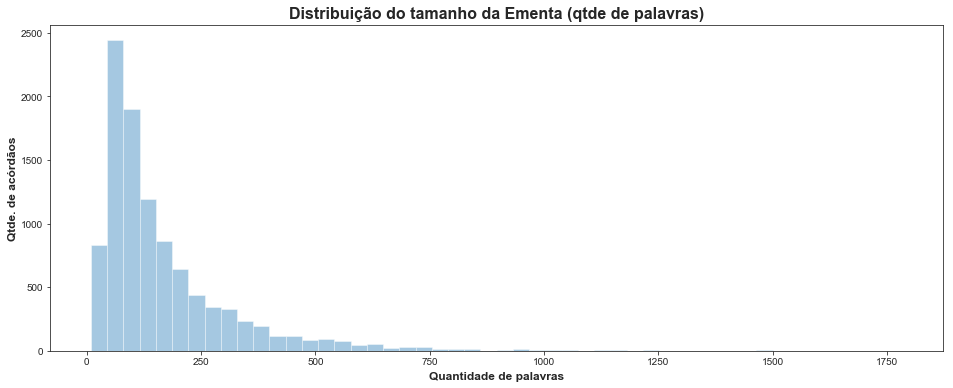

In [30]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.distplot(df_pal_ementa['word_count_ementa'], kde = False)
plt.title('Distribuição do tamanho da Ementa (qtde de palavras)', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Quantidade de palavras', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Qtde. de acórdãos', fontsize = 12, fontweight = 'bold')
plt.show()

In [31]:
pal_ementa_stem = []
for i in range(decisoes_com_B3_df.shape[0]):
    pal_ementa_stem.append(len(decisoes_com_B3_df['ementa_stem'][i].split(' ')))
df_pal_ementa_stem = pd.DataFrame(pal_ementa_stem, columns = ['word_count_ementa'])
df_pal_ementa_stem.describe()

word_count_ementa
count       10162.000000
mean          168.888998
std           154.304642
min             8.000000
25%            70.000000
50%           116.000000
75%           210.000000
max          1818.000000

[8 rows x 1 columns]

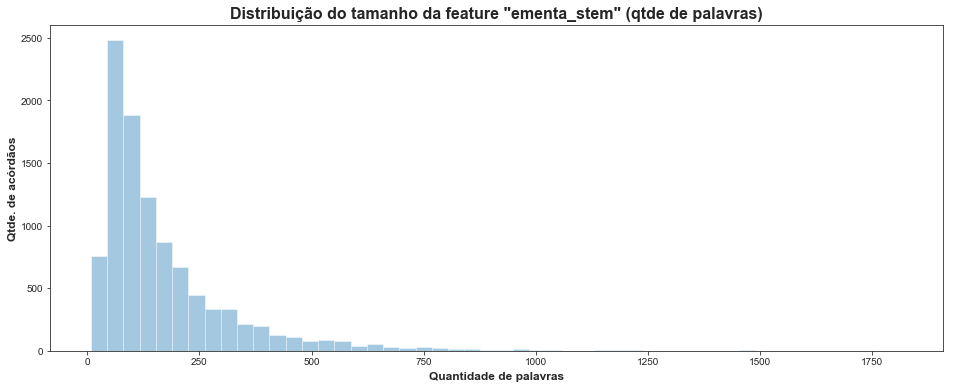

In [32]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.distplot(df_pal_ementa_stem['word_count_ementa'], kde = False)
plt.title('Distribuição do tamanho da feature "ementa_stem" (qtde de palavras)', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Quantidade de palavras', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Qtde. de acórdãos', fontsize = 12, fontweight = 'bold')
plt.show()

In [33]:
# Prepara a sparse matrix com a contagem de palavras na coluna "ementa_stem" do DataFrame, para possibilitar a criação 
# de um dicionário de palavras

CV = CountVectorizer()
matriz_contagens = CV.fit_transform(decisoes_com_B3_df['ementa_stem'])
matriz_contagens

<10162x11732 sparse matrix of type '<class 'numpy.int64'>'
	with 908351 stored elements in Compressed Sparse Row format>

In [34]:
#Cria um dicionário de palavras para a coluna "ementa_stem" do DataFrame

df_word_dict = pd.DataFrame(CV.get_feature_names(), columns = ['palavra'])
df_word_dict['vezes_que_aparece'] = matriz_contagens.sum(axis = 0).tolist()[0]

stopwords_wd = ["nº", "lei", "decreto", "irpj", "imposto", "pessoa", "jurídica", "calendário", "exercício", "período", 
                "renda", "apuração", "data", "empresa", "sujeito", "passivo", "contribuinte", "ano", "art", "sobre", "atos",
               "assunto", "ser", "direito", "sendo", "tributário", "tributária", "deve", "fato", "processo", "fiscal", 
               "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", 
                "ainda", "artigo", "legislação", "tal", "vez", "fisco", "auto", "quanto", "inciso", "recurso", "súmula",
                "matéria", "tributação", "sido", "aplica", "apenas", "autos", "infração", "base", "maior", "pode", "carf",
               "termos", "caso", "legal", "tributo", "gerador", "fatos", "normas", "relação", "possibilidade", "fins", 
                "após", "gerais", "partir", "fiscais", "ter", "assim", "meio", "anos", "efeito", "qualquer", "objeto", 
               "legais", "lucro", "mesma", "devem", "análise", "hipótese", "ato", "atos", "tendo", "conforme", 
                "cabe", "1º", "ii", "in", "tais", "falar", "desde", "brasil", "todos", "caracteriza", "ano-calendário",
               "correspondente", "efeitos", "aplicável", "art", "arts", "tributos", "embargo", "embargos", 
                   "anos-calendário", "contribuição", "federal", "aplica"]

#Acresce à lista de stopwords acima a lista padrão para o idioma português que havia sido importado do nltk
stopwords_wd.extend(stopwords)

#Aplica o stemming à lista de stopwords
stopwords_stem = []
for wd in stopwords_wd:
    palavra_stem = stemmer.stem(wd)
    stopwords_stem.append(palavra_stem)
stopwords_wd.extend(stopwords_stem)

for stopword_wd in stopwords_wd:
    df_remove = df_word_dict[df_word_dict['palavra'] == stopword_wd]
    df_word_dict.drop(labels = df_remove.index, inplace = True)
    
df_word_dict = df_word_dict.sort_values("vezes_que_aparece", ascending = False) # Ordena as linhas do dataframe
pd.set_option('display.max_rows', 20)
df_word_dict[0:20]

palavra  vezes_que_aparece
1863     compens               8312
2708      crédit               8273
7429        mult               8126
6764        lanç               7748
1946     comprov               7582
8005         pag               6758
9370      receit               5846
2717        csll               5367
210    administr               5349
11391        val               5166
9033        prov               5080
7830       ofíci               4284
2909      declar               4267
3320        desp               3574
10152       sald               3524
4427       estim               3477
2934      decorr               3236
7546        nega               3178
7842       omiss               3158
2898       decis               3092

[20 rows x 2 columns]

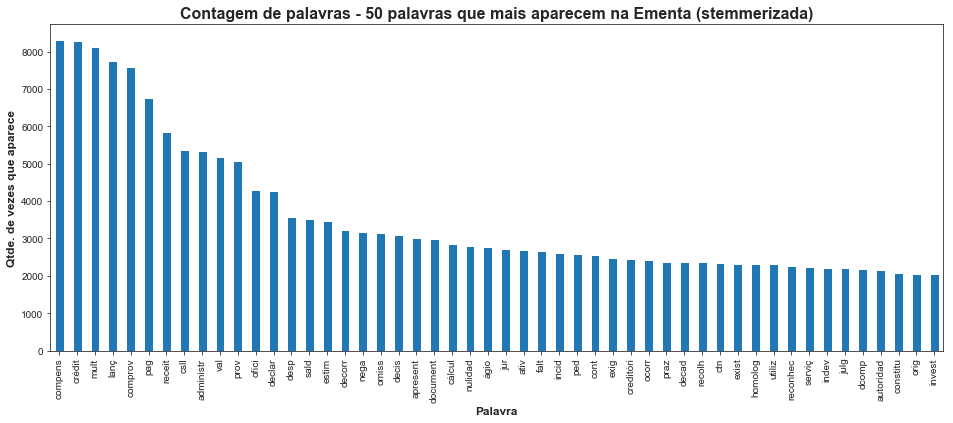

In [35]:
fig, ax = plt.subplots(figsize=(16, 6))
df_word_dict['vezes_que_aparece'][0:50].plot(kind = 'bar')
plt.title('Contagem de palavras - 50 palavras que mais aparecem na Ementa (stemmerizada)', fontsize = 16, fontweight = 'bold')
ax.set_xticklabels(df_word_dict['palavra'])
ax.set_xlabel('Palavra', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Qtde. de vezes que aparece', fontsize = 12, fontweight = 'bold')
plt.show()

In [36]:
df_agg = decisoes_com_B3_df.groupby(['tempo_para_dec']).agg({'nro_acordao': ['count']})
df_agg = df_agg.droplevel([0], axis = 1)
df_agg.rename(columns = {'count': 'qtde_acordaos'}, inplace = True)
df_agg.sort_index(inplace = True)
df_agg

qtde_acordaos
tempo_para_dec               
0                           5
1                          90
2                         522
3                         947
4                         751
5                         864
6                         615
7                         683
8                         781
9                        1037
...                       ...
20                         37
21                         10
22                          8
23                          6
24                          3
25                          5
26                          3
28                          1
29                          6
32                          1

[30 rows x 1 columns]

In [37]:
df_agg.tail(10)

qtde_acordaos
tempo_para_dec               
20                         37
21                         10
22                          8
23                          6
24                          3
25                          5
26                          3
28                          1
29                          6
32                          1

[10 rows x 1 columns]

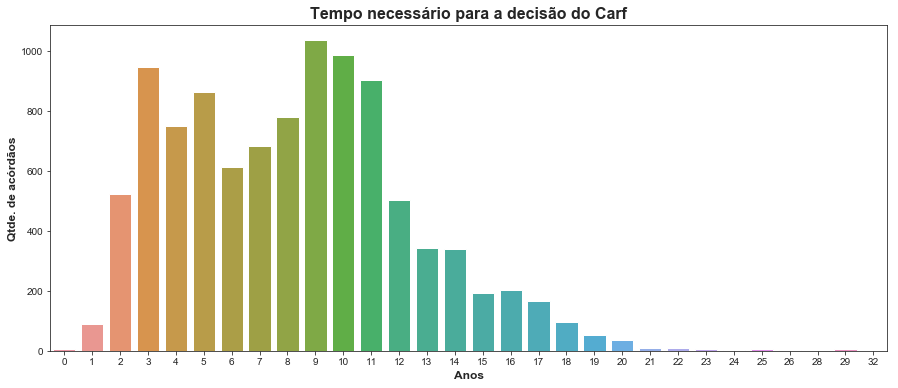

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(decisoes_com_B3_df['tempo_para_dec'])
plt.title("Tempo necessário para a decisão do Carf", fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Anos', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Qtde. de acórdãos', fontsize = 12, fontweight = 'bold')
plt.show()

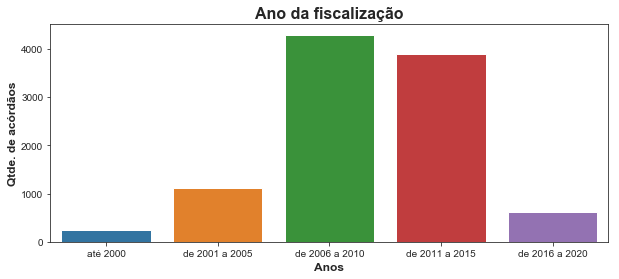

In [39]:
df_plot = decisoes_com_B3_df.sort_values(['bin_ano_fisc'])

fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(df_plot['bin_ano_fisc'])
plt.title("Ano da fiscalização", fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Anos', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Qtde. de acórdãos', fontsize = 12, fontweight = 'bold')
plt.show()

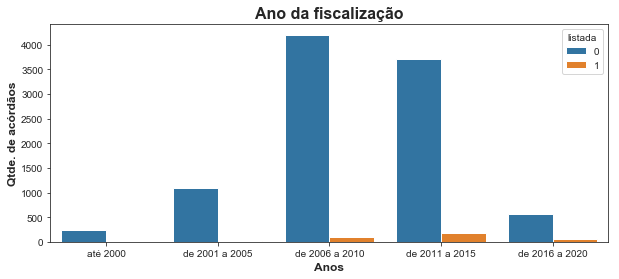

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(df_plot['bin_ano_fisc'], hue = df_plot['listada'])
plt.title("Ano da fiscalização", fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Anos', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Qtde. de acórdãos', fontsize = 12, fontweight = 'bold')
plt.show()

## CRIAÇÃO DO MODELO DE MACHINE LEARNING

In [41]:
#Ajusta o TF-IDF Vectorizer para calcular a importância de cada palavra na coluna "ementa_stem" do DataFrame, 
#gerando um novo DataFrame com o score TF-IDF de cada palavra, para cada linha do DataFrame original

stopwords_tfidf = ["nº", "lei", "decreto", "irpj", "imposto", "pessoa", "jurídica", "calendário", "exercício", "período", 
                "renda", "apuração", "data", "empresa", "sujeito", "passivo", "contribuinte", "ano", "art", "sobre", "atos",
               "assunto", "ser", "direito", "sendo", "tributário", "tributária", "deve", "fato", "processo", "fiscal", 
               "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", 
                "ainda", "artigo", "legislação", "tal", "vez", "fisco", "auto", "quanto", "inciso", "recurso", "súmula",
                "matéria", "tributação", "sido", "aplica", "apenas", "autos", "infração", "base", "maior", "pode", "carf",
               "termos", "caso", "legal", "tributo", "gerador", "fatos", "normas", "relação", "possibilidade", "fins", 
                "após", "gerais", "partir", "fiscais", "ter", "assim", "meio", "anos", "efeito", "qualquer", "objeto", 
               "legais", "lucro", "mesma", "devem", "análise", "hipótese", "ato", "atos", "tendo", "conforme", 
                "cabe", "1º", "ii", "in", "tais", "falar", "desde", "brasil", "todos", "caracteriza", "ano-calendário",
               "correspondente", "efeitos", "aplicável", "art", "arts", "tributos", "embargo", "embargos", 
                   "anos-calendário", "contribuição", "federal", "aplica"]


#Acrescenta à lista de stopwords acima a lista padrão para o idioma português que havia sido importada do nltk
stopwords_tfidf.extend(stopwords)

#Aplica o stemming à lista de stopwords
stopwords_stem = []
for palavra in stopwords_tfidf:
    palavra_stem = stemmer.stem(palavra)
    stopwords_stem.append(palavra_stem)
stopwords_tfidf.extend(stopwords_stem)

vectorizer = TfidfVectorizer(stop_words = stopwords_tfidf, min_df = 5, max_features = 8000)
matriz_tfidf_ementa = vectorizer.fit_transform(decisoes_com_B3_df['ementa_stem'])

df_matriz_tfidf_ementa = pd.DataFrame(matriz_tfidf_ementa.toarray(), columns = vectorizer.get_feature_names())
pd.set_option('display.max_rows', 10)
df_matriz_tfidf_ementa

abaix  abandon  abarc  abastec  abat  abert  abord  abrang  abrange  \
0        0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   
1        0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   
2        0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   
3        0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   
4        0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   
...      ...      ...    ...      ...   ...    ...    ...     ...      ...   
10157    0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   
10158    0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   
10159    0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   
10160    0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   
10161    0.0      0.0    0.0      0.0   0.0    0.0    0.0     0.0      0.0   

       abrangente  abrig  abril  absolut  absorv  absorç  abstrat  abstrata  \
0             0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   
1             0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   
2             0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   
3             0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   
4             0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   
...           ...    ...    ...      ...     ...     ...      ...       ...   
10157         0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   
10158         0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   
10159         0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   
10160         0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   
10161         0.0    0.0    0.0      0.0     0.0     0.0      0.0       0.0   

           abus  abusiv  abusiva  abusivo   ac  acab   acarret  acas  acaso  \
0      0.000000     0.0      0.0      0.0  0.0   0.0  0.000000   0.0    0.0   
1      0.000000     0.0      0.0      0.0  0.0   0.0  0.000000   0.0    0.0   
2      0.000000     0.0      0.0      0.0  0.0   0.0  0.000000   0.0    0.0   
3      0.108043     0.0      0.0      0.0  0.0   0.0  0.000000   0.0    0.0   
4      0.000000     0.0      0.0      0.0  0.0   0.0  0.000000   0.0    0.0   
...         ...     ...      ...      ...  ...   ...       ...   ...    ...   
10157  0.000000     0.0      0.0      0.0  0.0   0.0  0.124805   0.0    0.0   
10158  0.000000     0.0      0.0      0.0  0.0   0.0  0.216274   0.0    0.0   
10159  0.000000     0.0      0.0      0.0  0.0   0.0  0.000000   0.0    0.0   
10160  0.000000     0.0      0.0      0.0  0.0   0.0  0.000000   0.0    0.0   
10161  0.000000     0.0      0.0      0.0  0.0   0.0  0.000000   0.0    0.0   

       acat  aceit  aceler  acelerada  acepç  acerc  acert  acerv  acess  \
0       0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...     ...        ...    ...    ...    ...    ...    ...   
10157   0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   
10158   0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   
10159   0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   
10160   0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   
10161   0.0    0.0     0.0        0.0    0.0    0.0    0.0    0.0    0.0   

       acesso  acessór  acessóri  acessória  acessórias  acim  acion  \
0         0.0      0.0       0.0        0.0         0.0   0.0    0.0   
1         0.0      0.0       0.0        0.0         0.0   0.0    0.0   
2         0.0      0.0       0.0        0.0

In [42]:
# Redução da dimensionalidade da matriz esparsa gerada pelo TF-IDF, a fim de contornar a Maldição da Dimensionalidade

svd = TruncatedSVD(n_components = 100, n_iter = 7, random_state = 1)
matriz_tfidf_ementa_svd = svd.fit_transform(df_matriz_tfidf_ementa)
df_matriz_tfidf_ementa_svd = pd.DataFrame(matriz_tfidf_ementa_svd)
df_matriz_tfidf_ementa_svd

0         1         2         3         4         5         6   \
0      0.203804 -0.100617  0.104247  0.041540 -0.030452 -0.006915 -0.001620   
1      0.156242 -0.161744 -0.059412 -0.039349  0.036911  0.000594 -0.077940   
2      0.109787 -0.093073 -0.044051  0.000711  0.019819 -0.007298  0.012935   
3      0.308239 -0.209236  0.268928  0.075264 -0.108940  0.045528  0.005563   
4      0.079433 -0.048485 -0.037480 -0.025983 -0.028954 -0.030543 -0.071623   
...         ...       ...       ...       ...       ...       ...       ...   
10157  0.451859  0.189131 -0.107547  0.100765 -0.004681 -0.026449 -0.008050   
10158  0.412898  0.288730 -0.062713 -0.097904  0.038717 -0.177753  0.097649   
10159  0.075319 -0.010620 -0.058836 -0.005841 -0.004627  0.018979 -0.000365   
10160  0.337278  0.114172  0.015295 -0.045299  0.074090 -0.075005  0.069285   
10161  0.327462  0.176833 -0.208809  0.149973 -0.081109 -0.003929  0.104827   

             7         8         9         10        11        12        13  \
0      0.050853 -0.055373  0.047334 -0.023387  0.057655 -0.006497 -0.012095   
1     -0.129658 -0.153298 -0.119529 -0.022326  0.091740  0.190027  0.133841   
2     -0.033681  0.004886 -0.015957  0.032520 -0.015357  0.050487  0.006177   
3      0.136225 -0.093078  0.003165 -0.065510  0.107642 -0.023853 -0.075339   
4     -0.054195 -0.023071 -0.016647  0.024165 -0.020451  0.021463  0.003991   
...         ...       ...       ...       ...       ...       ...       ...   
10157  0.034841  0.000989 -0.013895 -0.000279 -0.043432  0.026755 -0.057854   
10158  0.101865 -0.053796  0.039309 -0.027573  0.079987 -0.064598 -0.041518   
10159 -0.014448 -0.029349 -0.029781 -0.007617 -0.010227  0.053861 -0.021784   
10160 -0.008471 -0.012345  0.096395  0.008373  0.060119 -0.019543  0.061206   
10161  0.070572 -0.029863  0.057863  0.011902 -0.000585  0.020117 -0.089862   

             14        15        16        17        18        19        20  \
0      0.024345  0.082782 -0.049279 -0.003271 -0.037427 -0.015332  0.027965   
1      0.260559 -0.013756  0.094271 -0.073290 -0.050485 -0.046852  0.010743   
2     -0.015996 -0.038018 -0.088732 -0.002810  0.119855  0.035534 -0.042567   
3     -0.082841  0.141550  0.069056  0.033505 -0.077876 -0.001426  0.079438   
4     -0.020589 -0.038251  0.071474 -0.107392  0.021649  0.013730 -0.021106   
...         ...       ...       ...       ...       ...       ...       ...   
10157  0.018401  0.066912 -0.067676 -0.115852 -0.091223  0.056080 -0.051776   
10158 -0.023412 -0.109311  0.108688 -0.046199  0.011939  0.019404 -0.208183   
10159 -0.040283  0.003488  0.038919  0.037088  0.023629  0.042920 -0.022558   
10160  0.025148  0.128738 -0.188191 -0.115733  0.000428  0.048040  0.025209   
10161  0.046201 -0.038728  0.059708 -0.045314 -0.002969  0.092844 -0.006354   

             21        22        23        24        25        26        27  \
0     -0.051528  0.029712 -0.030289 -0.011384 -0.007814 -0.009211 -0.106646   
1      0.110431  0.099337  0.002301 -0.017056 -0.003274 -0.034994 -0.009793   
2     -0.031641  0.010337  0.026515  0.052981  0.025834  0.007153  0.024441   
3     -0.010677 -0.054426  0.006213  0.100486 -0.009538 -0.001274 -0.010448   
4      0.036845  0.040847 -0.015187 -0.034873 -0.016076  0.021265  0.028052   
...         ...       ...       ...       ...       ...       ...       ...   
10157  0.049853  0.006101 -0.056432  0.026018 -0.018277 -0.027770 -0.028510   
10158  0.058901 -0.077310 -0.108842  0.111303 -0.000946 -0.041601 -0.010043   
10159 -0.051457 -0.023663  0.033895 -0.054657 -0.012433  0.035416  0.009275   
10160 -0.131178  0.230656  0.093792 -0.026729 -0.065597  0.019231 -0.035326   
10161  0.051554 -0.078186  0.063230  0.083092 -0.136341 -0.061262  0.068315   

             28        29        30        31        32        33        34  \
0      0.017198 -0.081436  0.010071 -0.013441 -0.002265  0.017206 -0.006402   
1      0.054992 -0.010161  0.001162 -0.041428  0.005313 -0.

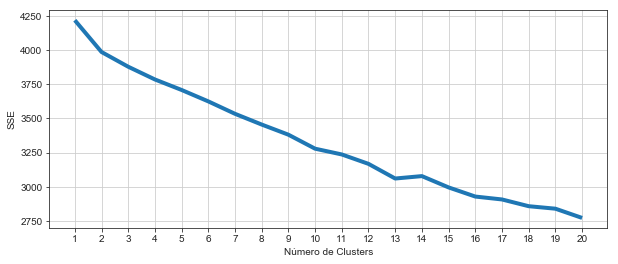

In [43]:
# Identificação do número ótimo de clusters pelo Método de Elbow
# Adaptado de https://realpython.com/k-means-clustering-python/

sse = []
for k in range(1,21):
    kmeans = KMeans(n_clusters = k, n_init = 10, init = 'k-means++', max_iter = 300, random_state = 1)
    kmeans.fit(matriz_tfidf_ementa_svd)
    sse.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 4))
plt.style.use("fivethirtyeight")
plt.grid(b=True)
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()

In [44]:
# Instalação da Library kneed para calcular, programaticamente, o número ótimo de clusters
# Adaptado de https://realpython.com/k-means-clustering-python/

!pip install kneed

In [45]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 21), sse, curve="convex", direction="decreasing")
kl.elbow

13

In [46]:
# Implementação do K-Means para a feature "ementa", já stemmerizada, utilizando o nro. ótimo de clusters

nro_clusters = kl.elbow
kmeans = KMeans(n_clusters = nro_clusters, n_init = 10, init = 'k-means++', max_iter = 300, random_state = 1)
arr_clusters = kmeans.fit_predict(matriz_tfidf_ementa_svd)
d_clusters = {'cluster': arr_clusters, 
              'nro_acordao': decisoes_com_B3_df['nro_acordao'], 
              'bin_ano_fisc': decisoes_com_B3_df['bin_ano_fisc'],
              'tempo_para_dec': decisoes_com_B3_df['tempo_para_dec'],
             'listada': decisoes_com_B3_df['listada']}
df_clusters = pd.DataFrame(d_clusters, columns = ['cluster', 'nro_acordao', 'bin_ano_fisc', 'tempo_para_dec', 'listada'])
labels = kmeans.labels_
labels

array([3, 3, 3, ..., 3, 0, 0])

In [47]:
df_clusters

cluster   nro_acordao    bin_ano_fisc  tempo_para_dec  listada
0            3  3802-000.127  de 2006 a 2010               3        0
1            3  9303-004.226  de 2011 a 2015               5        0
2            3  1401-001.738  de 2011 a 2015               5        0
3           10  1401-001.639  de 2011 a 2015               5        0
4            3  1401-001.734  de 2001 a 2005              13        0
...        ...           ...             ...             ...      ...
10157        0  1002-000.931  de 2006 a 2010              10        0
10158       11  1002-000.941  de 2006 a 2010              10        0
10159        3  1003-001.189  de 2006 a 2010              11        0
10160        0  1402-004.261  de 2006 a 2010              11        0
10161        0  1001-001.520  de 2006 a 2010              10        0

[10162 rows x 5 columns]

In [48]:
# Acrescentar a feature "cluster_ementa" ao DataFrame
df_labels = pd.DataFrame(labels, columns = ['cluster_ementa'])
decisoes_com_B3_df.reset_index(drop = True, inplace = True)
decisoes_com_B3_df = pd.merge(decisoes_com_B3_df, df_labels, how = 'inner', left_index = True, right_index = True)
decisoes_com_B3_df.head(3)

nro_acordao                                          nome_cont  \
0  3802-000.127               EMPRESA DE TRANSPORTES SAO LUIZ LTDA   
1  9303-004.226  TOV CORRETORA DE CAMBIO, TITULOS E VALORES MOB...   
2  1401-001.738  SOCIEDADE EXPORTADORA E INDUSTRIAL DE MADEIRAS...   

               nro_proc ano_fisc    bin_ano_fisc  \
0  10580.004698/2006-14     2006  de 2006 a 2010   
1  16327.721705/2011-82     2011  de 2011 a 2015   
2  11030.721079/2011-36     2011  de 2011 a 2015   

                         tipo_rec    dt_secao ano_dec  tempo_para_dec  \
0              RECURSO VOLUNTARIO  19/11/2009    2009               3   
1  RECURSO ESPECIAL DO PROCURADOR  10/08/2016    2016               5   
2              RECURSO VOLUNTARIO  04/10/2016    2016               5   

                        relator  \
0                       Relator   
1       Rodrigo da Costa Pôssas   
2  MARCOS DE AGUIAR VILLAS BOAS   

                                             decisao  \
0  Vistos, relatados e discutidos os presentes au...   
1  Acordam os membros do Colegiado, por unanimida...   
2  Vistos, relatados e discutidos os presentes au...   

                                              ementa  listada cnpj nome_cia  \
0  Assunto: Normas Gerais de Direito Tributário\n...        0  NaN      NaN   
1  PROCESSO ADMINISTRATIVO FISCAL Ano-calendário:...        0  NaN      NaN   
2  Assunto: Imposto sobre a Renda de Pessoa Juríd...        0  NaN      NaN   

  ativ_princ  receita_2019  res_antes_tl_2019  ir_corr_2019  etrc_2019  \
0        NaN           NaN                NaN           NaN        NaN   
1        NaN           NaN                NaN           NaN        NaN   
2        NaN           NaN                NaN           NaN        NaN   

   ativo_total_2019  pl_2019  \
0               NaN      NaN   
1               NaN      NaN   
2               NaN      NaN   

                                      ementa_sem_dig  \
0  Assunto: Normas Gerais de Direito Tributário\n...   
1  PROCESSO ADMINISTRATIVO FISCAL Ano-calendário:...   
2  Assunto: Imposto sobre a Renda de Pessoa Juríd...   

                                         ementa_stem  cluster_ementa  
0  assunt norm geral de direit tribut dat do fat ...               3  
1  process administr fiscal ano-calend receit de ...               3  
2  assunt impost sobr a rend de pesso juríd irpj ...               3  

[3 rows x 25 columns]

In [49]:
decisoes_com_B3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 25 columns):
nro_acordao          10162 non-null object
nome_cont            10162 non-null object
nro_proc             10162 non-null object
ano_fisc             10162 non-null object
bin_ano_fisc         10162 non-null object
tipo_rec             10162 non-null object
dt_secao             10162 non-null object
ano_dec              10162 non-null object
tempo_para_dec       10162 non-null int64
relator              10162 non-null object
decisao              10162 non-null object
ementa               10162 non-null object
listada              10162 non-null int64
cnpj                 335 non-null object
nome_cia             335 non-null object
ativ_princ           312 non-null object
receita_2019         335 non-null float64
res_antes_tl_2019    335 non-null float64
ir_corr_2019         335 non-null float64
etrc_2019            335 non-null float64
ativo_total_2019     335 non-null float64
p

In [50]:
# Type cast da feature 'cluster_ementa'
decisoes_com_B3_df['cluster_ementa'] = decisoes_com_B3_df['cluster_ementa'].astype('str')
decisoes_com_B3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 25 columns):
nro_acordao          10162 non-null object
nome_cont            10162 non-null object
nro_proc             10162 non-null object
ano_fisc             10162 non-null object
bin_ano_fisc         10162 non-null object
tipo_rec             10162 non-null object
dt_secao             10162 non-null object
ano_dec              10162 non-null object
tempo_para_dec       10162 non-null int64
relator              10162 non-null object
decisao              10162 non-null object
ementa               10162 non-null object
listada              10162 non-null int64
cnpj                 335 non-null object
nome_cia             335 non-null object
ativ_princ           312 non-null object
receita_2019         335 non-null float64
res_antes_tl_2019    335 non-null float64
ir_corr_2019         335 non-null float64
etrc_2019            335 non-null float64
ativo_total_2019     335 non-null float64
p

## Avaliação dos resultados da clusterização pela feature "ementa"

In [51]:
listadas_por_cluster = df_clusters[df_clusters['listada'] == 1].groupby([
    'cluster']).agg({'listada': ['count']})
nao_listadas_por_cluster = df_clusters[df_clusters['listada'] == 0].groupby([
    'cluster']).agg({'listada': ['count']})
df_acordaos_por_cluster = pd.merge(listadas_por_cluster, nao_listadas_por_cluster, 
                                how = 'outer', left_index = True, right_index = True)
df_acordaos_por_cluster.rename(columns = {'listada_x': 'qtde_listadas', 'listada_y': 'qtde_nao_listadas'}, inplace = True)
df_acordaos_por_cluster = df_acordaos_por_cluster.droplevel([1], axis = 1)
df_acordaos_por_cluster['qtde_listadas'] = df_acordaos_por_cluster['qtde_listadas'].fillna(0)
df_acordaos_por_cluster['qtde_listadas'] = df_acordaos_por_cluster['qtde_listadas'].apply(int)
df_acordaos_por_cluster['qtde_acordaos'] = df_acordaos_por_cluster[
    'qtde_listadas'] + df_acordaos_por_cluster['qtde_nao_listadas']
df_acordaos_por_cluster['%_listadas'] = round(df_acordaos_por_cluster[
    'qtde_listadas'] / df_acordaos_por_cluster['qtde_acordaos'] * 100, 2)
pd.set_option('display.max_rows', 20)
df_acordaos_por_cluster

qtde_listadas  qtde_nao_listadas  qtde_acordaos  %_listadas
cluster                                                             
0                   17               1345           1362        1.25
1                    6               1155           1161        0.52
2                    0                 91             91        0.00
3                  171               3616           3787        4.52
4                    0                378            378        0.00
5                   12                176            188        6.38
6                   31                342            373        8.31
7                    1                207            208        0.48
8                    0                232            232        0.00
9                    0                 98             98        0.00
10                  21                546            567        3.70
11                  58               1092           1150        5.04
12                  18                549            567        3.17

[13 rows x 4 columns]

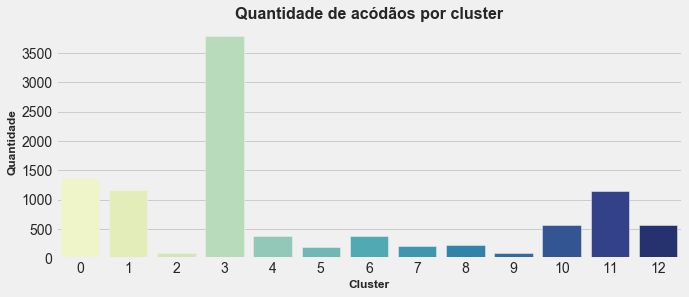

In [52]:
# Visualização da quantidade de documentos por cluster

fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(df_clusters['cluster'], palette = 'YlGnBu')
plt.title("Quantidade de acódãos por cluster", fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Cluster', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Quantidade', fontsize = 12, fontweight = 'bold')
plt.show()

In [53]:
# WORDCLOUD
# Adaptado de https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

!pip install wordcloud

Cluster: 0
Qtde Acórdãos: 1362
Listadas: 1.25%


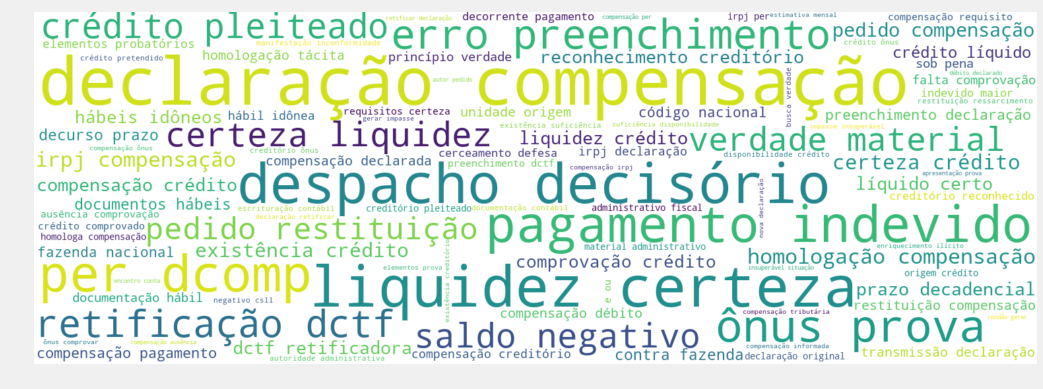

Cluster: 1
Qtde Acórdãos: 1161
Listadas: 0.52%


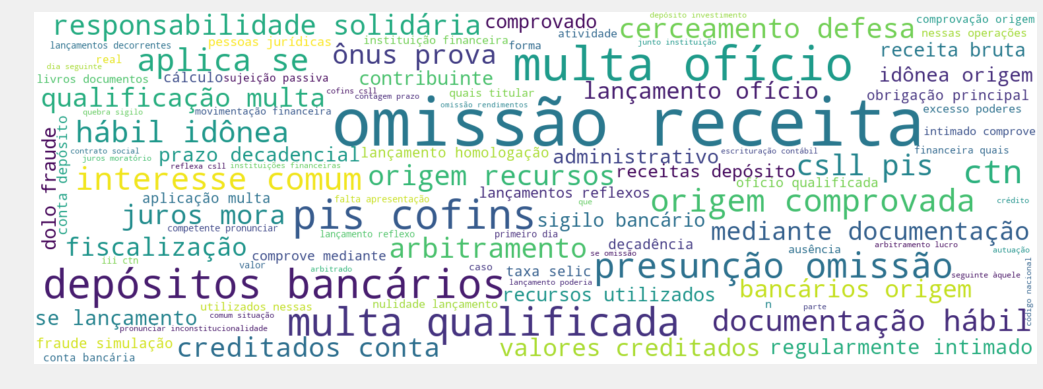

Cluster: 2
Qtde Acórdãos: 91
Listadas: 0.0%


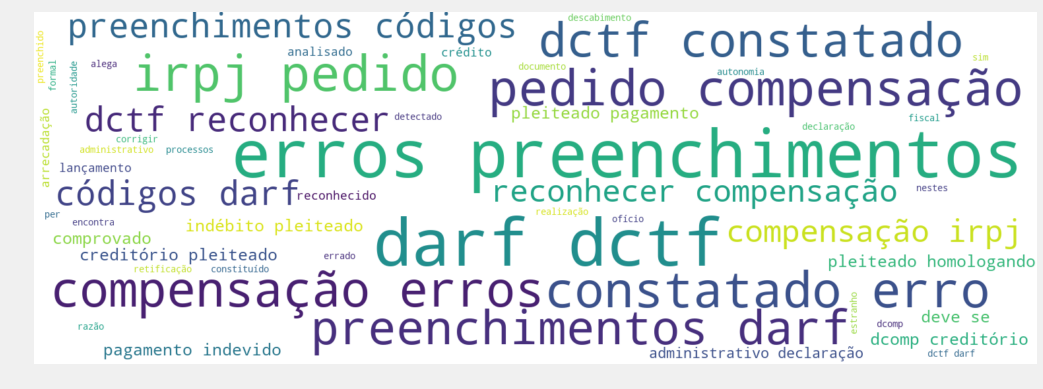

Cluster: 3
Qtde Acórdãos: 3787
Listadas: 4.52%


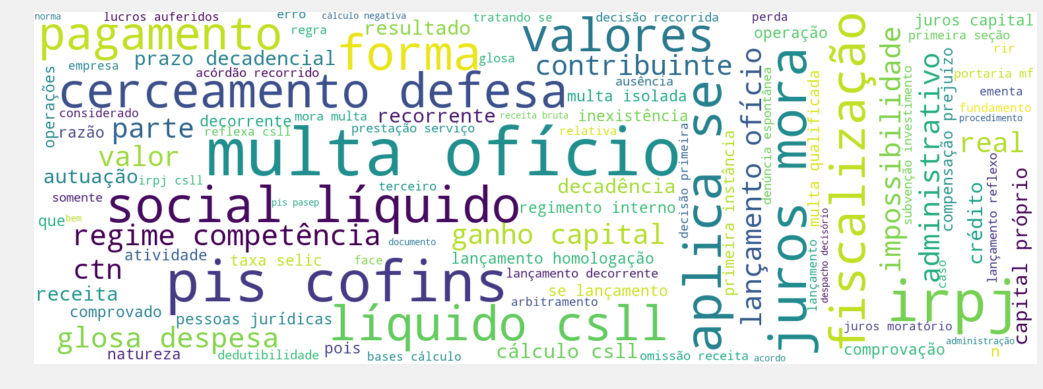

Cluster: 4
Qtde Acórdãos: 378
Listadas: 0.0%


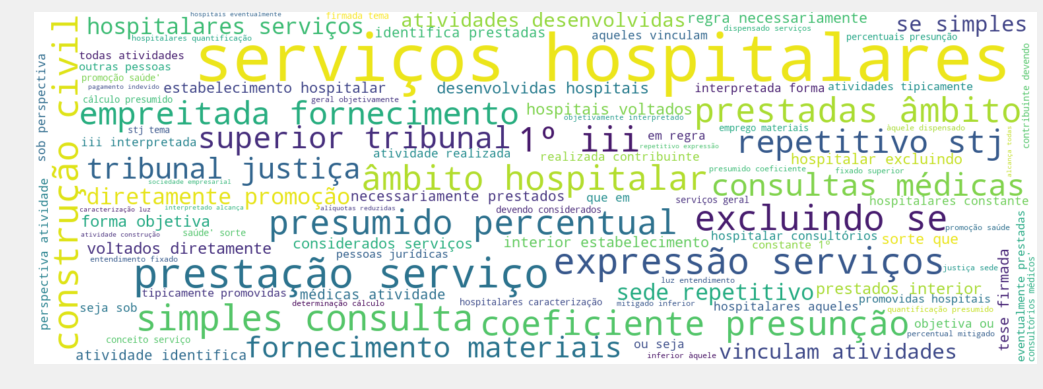

Cluster: 5
Qtde Acórdãos: 188
Listadas: 6.38%


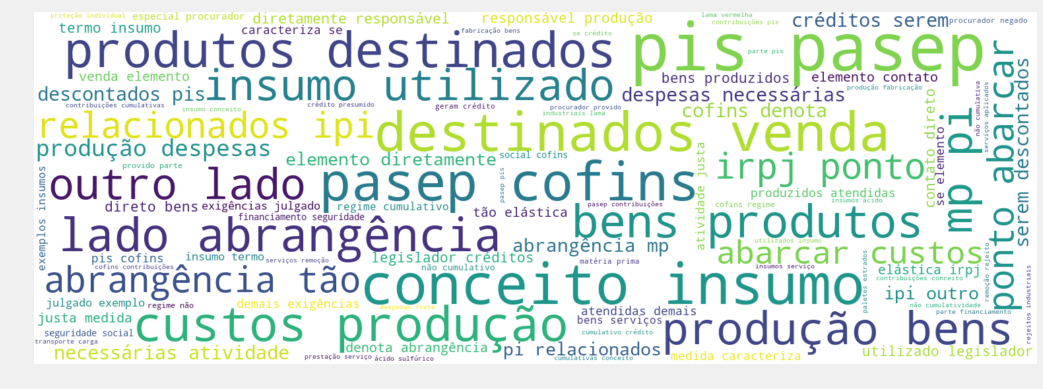

Cluster: 6
Qtde Acórdãos: 373
Listadas: 8.31%


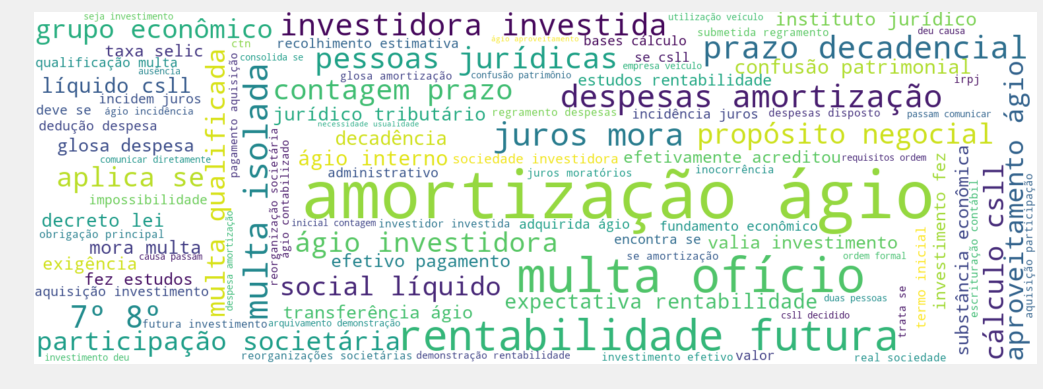

Cluster: 7
Qtde Acórdãos: 208
Listadas: 0.48%


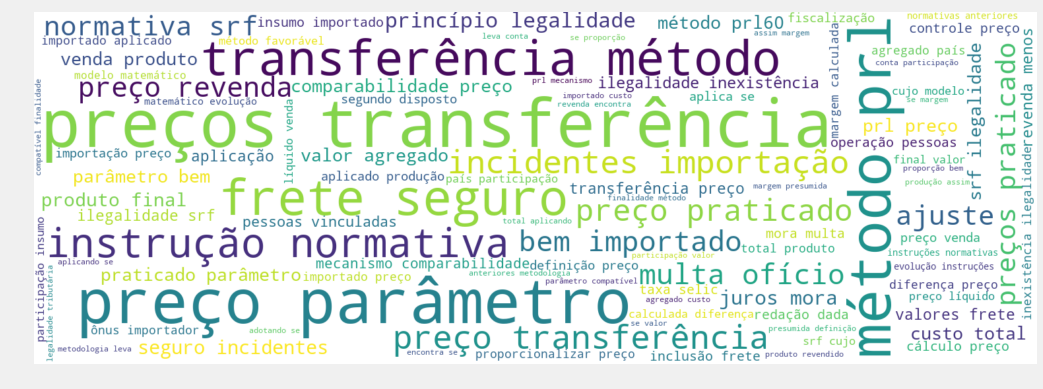

Cluster: 8
Qtde Acórdãos: 232
Listadas: 0.0%


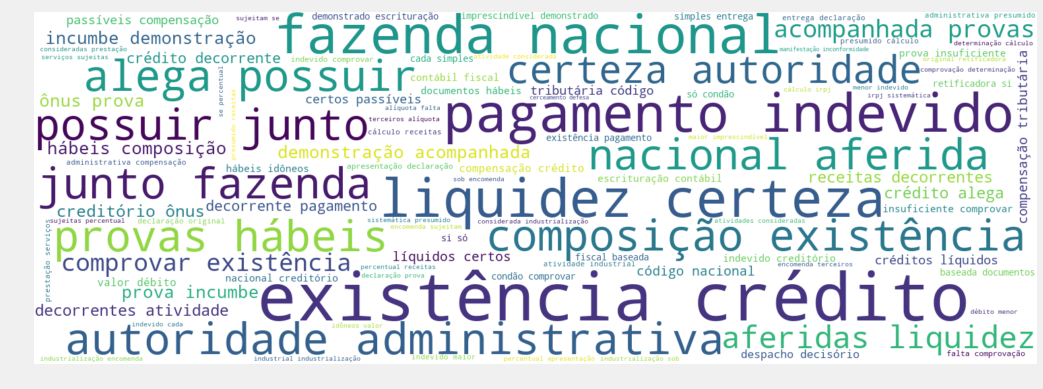

Cluster: 9
Qtde Acórdãos: 98
Listadas: 0.0%


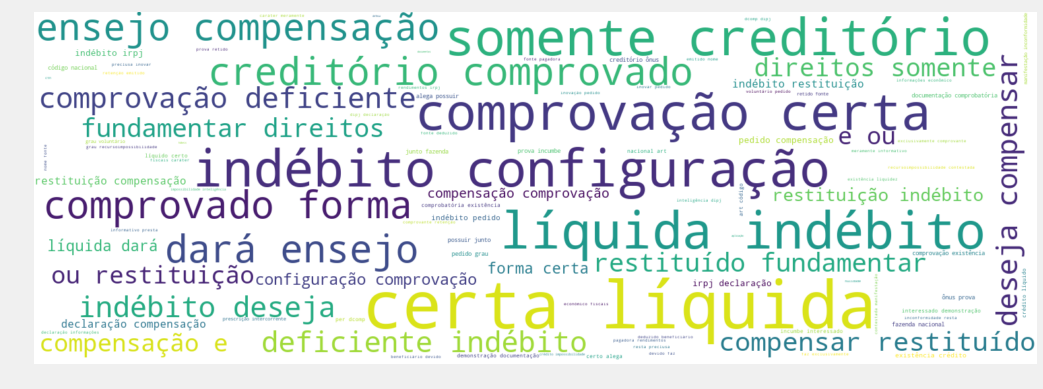

Cluster: 10
Qtde Acórdãos: 567
Listadas: 3.7%


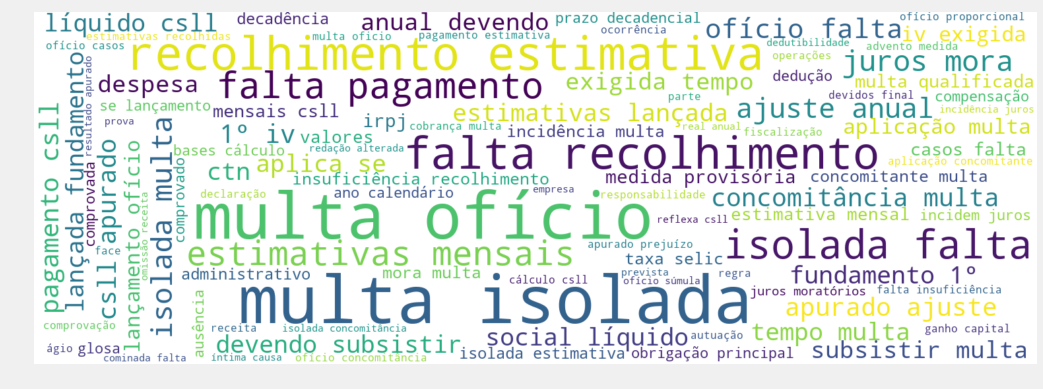

Cluster: 11
Qtde Acórdãos: 1150
Listadas: 5.04%


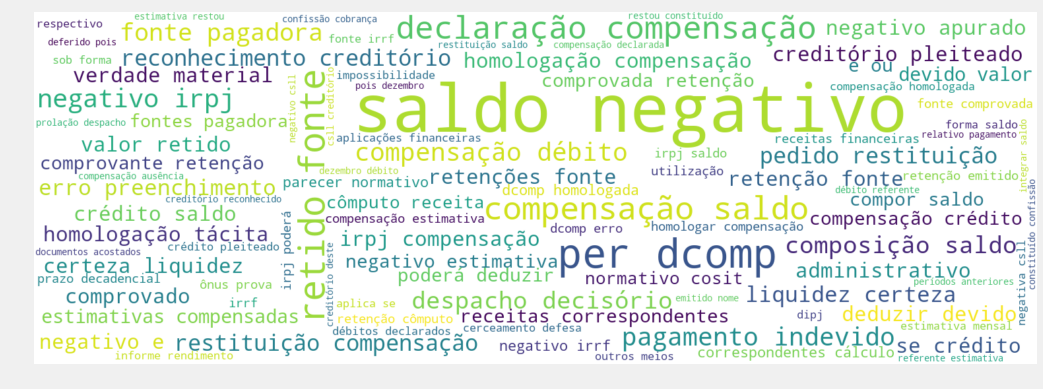

Cluster: 12
Qtde Acórdãos: 567
Listadas: 3.17%


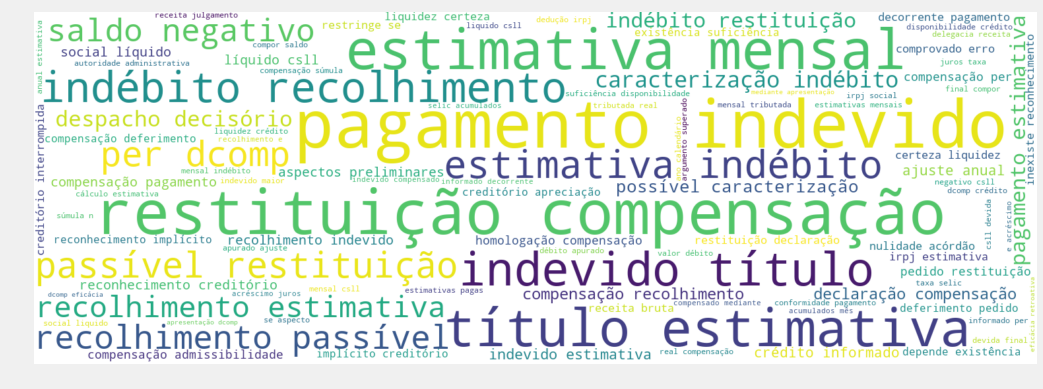

In [54]:
from wordcloud import WordCloud

# Remove as stopwords da ementa, para fins de plotagem da Wordcloud
def remove_stopwords(texto):
    texto = texto.lower()
    itens = texto.replace('\n', ' ').replace('.', '').replace(':', '').split(' ') #transforma a ementa em uma lista de palavras
    for sw in stopwords_tfidf: #Utiliza a mesma lista de stopwords utilizada para o tf-idf
        for n in range(itens.count(sw)):
            itens.remove(sw)
    res = ' '.join(map(str, itens)) #remonta a string, transformando a lista de palavras em um único string
    return res                

decisoes_com_B3_df['ementa_clean'] = decisoes_com_B3_df['ementa'].apply(remove_stopwords)

# Constrói a Wordcloud
result = {'cluster': labels, 'ementa': decisoes_com_B3_df['ementa_clean']}
result = pd.DataFrame(result)
for k in range(0, nro_clusters):
   s = result[result['cluster'] == k]
   text = s['ementa'].str.cat(sep=' ')
   text = text.lower()
   text = ' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size = 100, width = 1520, height = 535, max_words = 100,
                         colormap = 'viridis', background_color = "white")
   wordcloud.generate(text)
   print('Cluster: {}'.format(k))
   qtde_acordaos = int(df_acordaos_por_cluster.loc[k]['qtde_acordaos'])
   print('Qtde Acórdãos: {}'.format(qtde_acordaos))
   perc_listadas = df_acordaos_por_cluster.loc[k]['%_listadas']
   print('Listadas: {}%'.format(perc_listadas))
   plt.figure(figsize = (16,9))
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [55]:
# Determinação dos termos mais frequentes em cada cluster

CV = CountVectorizer()

stopwords_freq = ["nº", "lei", "decreto", "irpj", "imposto", "pessoa", "jurídica", "calendário", "exercício", "período", 
                "renda", "apuração", "data", "empresa", "sujeito", "passivo", "contribuinte", "ano", "art", "sobre", "atos",
               "assunto", "ser", "direito", "sendo", "tributário", "tributária", "deve", "fato", "processo", "fiscal", 
               "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", 
                "ainda", "artigo", "legislação", "tal", "vez", "fisco", "auto", "quanto", "inciso", "recurso", "súmula",
                "matéria", "tributação", "sido", "aplica", "apenas", "autos", "infração", "base", "maior", "pode", "carf",
               "termos", "caso", "legal", "tributo", "gerador", "fatos", "normas", "relação", "possibilidade", "fins", 
                "após", "gerais", "partir", "fiscais", "ter", "assim", "meio", "anos", "efeito", "qualquer", "objeto", 
               "legais", "lucro", "mesma", "devem", "análise", "hipótese", "ato", "atos", "tendo", "conforme", 
                "cabe", "1º", "ii", "in", "tais", "falar", "desde", "brasil", "todos", "caracteriza", "ano-calendário",
               "correspondente", "efeitos", "aplicável", "art", "arts", "tributos", "embargo", "embargos", 
                   "anos-calendário", "contribuição", "federal", "aplica"]

#Acresce à lista de stopwords acima a lista padrão para o idioma português que havia sido importado do nltk
stopwords_freq.extend(stopwords)

df_termos_freq = pd.DataFrame()
for i in range(0, nro_clusters):
    matriz_contagens = CV.fit_transform(decisoes_com_B3_df[decisoes_com_B3_df['cluster_ementa'] == str(i)]['ementa_sem_dig'])
    df_cont_pal = pd.DataFrame(CV.get_feature_names(), columns = ['palavra'])
    df_cont_pal['cluster_ementa'] = i
    df_cont_pal['freq'] = matriz_contagens.sum(axis = 0).tolist()[0]
    for stopword in stopwords_freq:
        df_remove = df_cont_pal[df_cont_pal['palavra'] == stopword]
        df_cont_pal.drop(labels = df_remove.index, inplace = True)
    df_cont_pal.sort_values(['freq'], ascending = False, inplace = True)
    df_termos_freq = pd.concat([df_termos_freq, df_cont_pal[0:20]]) #Só armazena os 20 termos mais frequentes em cada cluster

df_termos_freq

palavra  cluster_ementa  freq
506      compensação               0  2786
768          crédito               0  2043
836       declaração               0  1143
761       creditório               0   967
808            dcomp               0   884
810             dctf               0   879
539      comprovação               0   811
2325          pedido               0   788
1999        liquidez               0   784
440          certeza               0   783
...              ...             ...   ...
493      estimativas              12   359
294       creditório              12   353
316            dcomp              12   307
299             csll              12   268
869         passível              12   236
879              per              12   224
871           pedido              12   219
1089           saldo              12   192
791         negativo              12   185
161   caracterização              12   170

[260 rows x 3 columns]

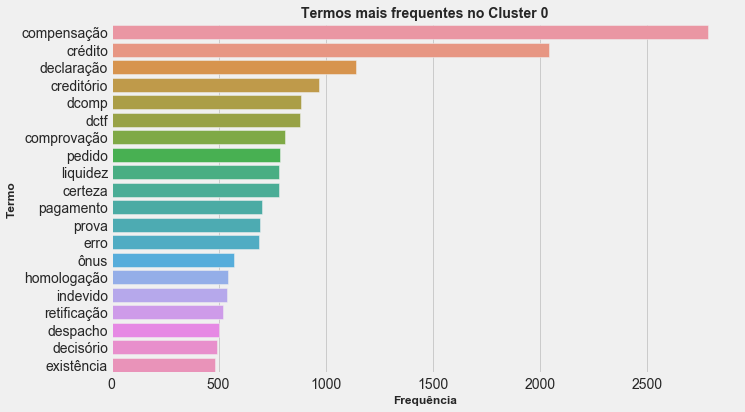

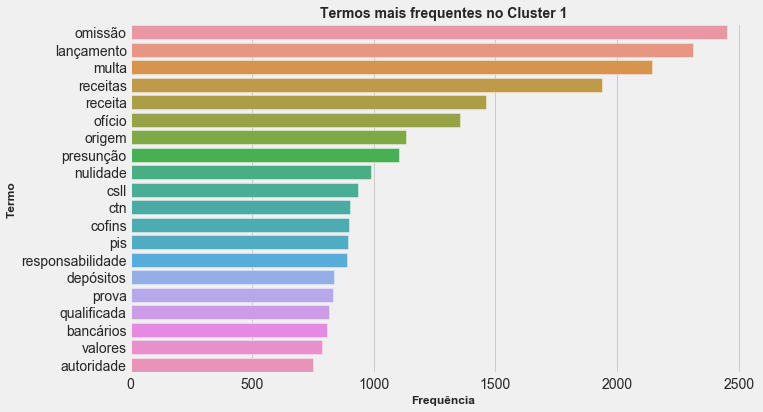

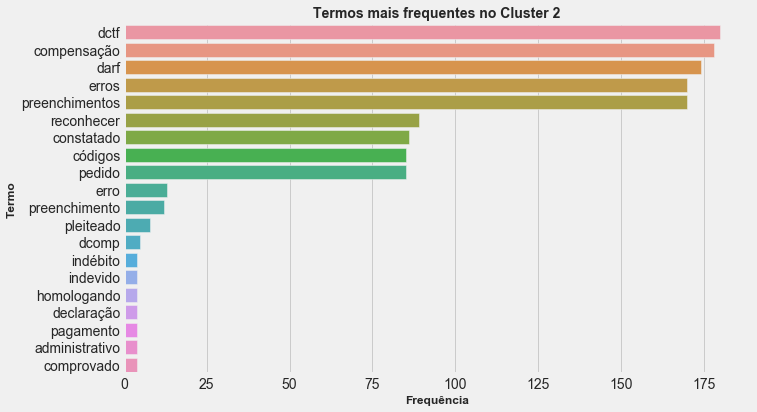

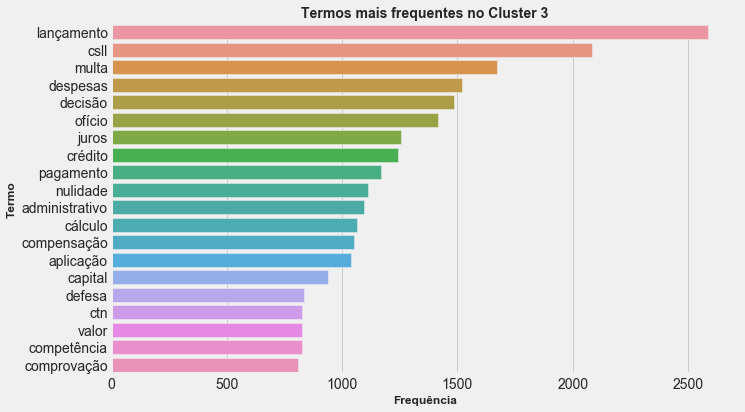

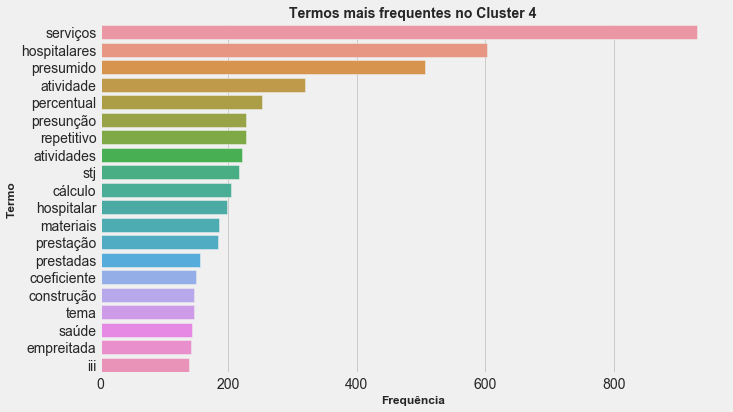

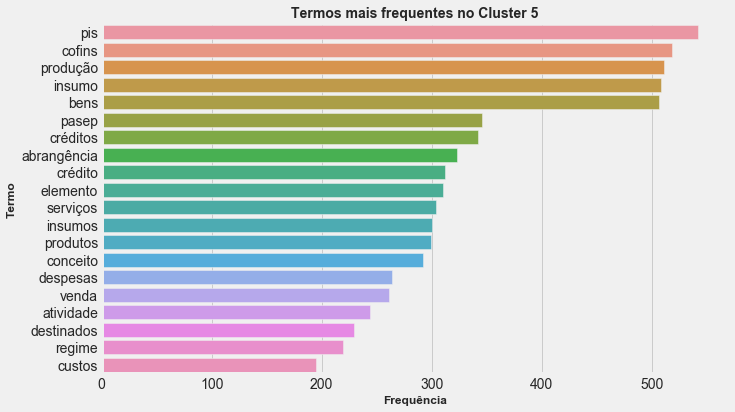

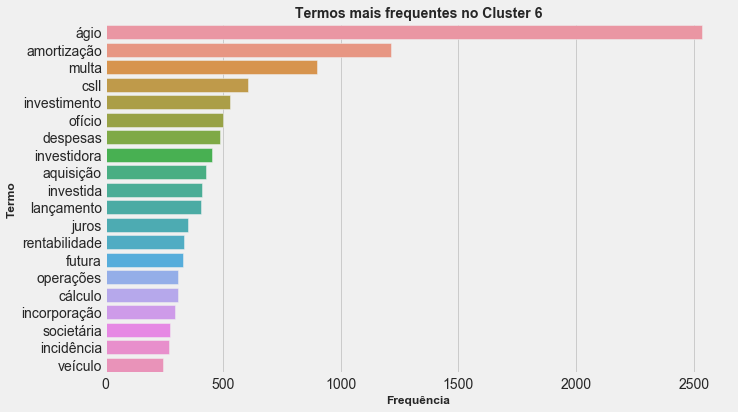

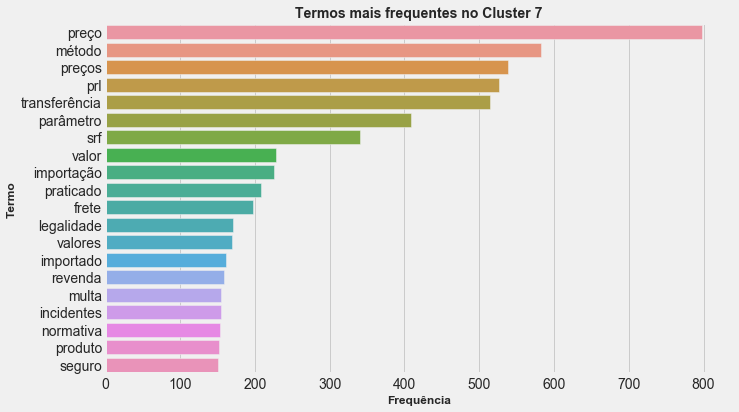

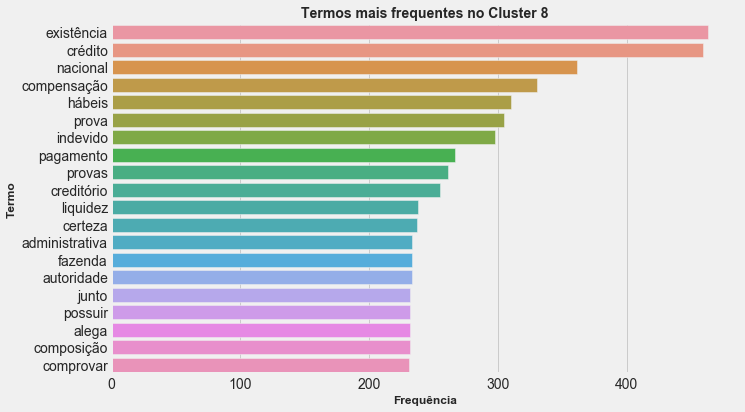

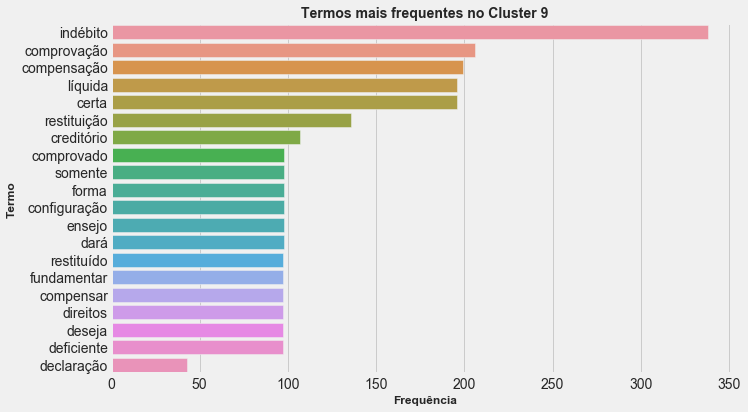

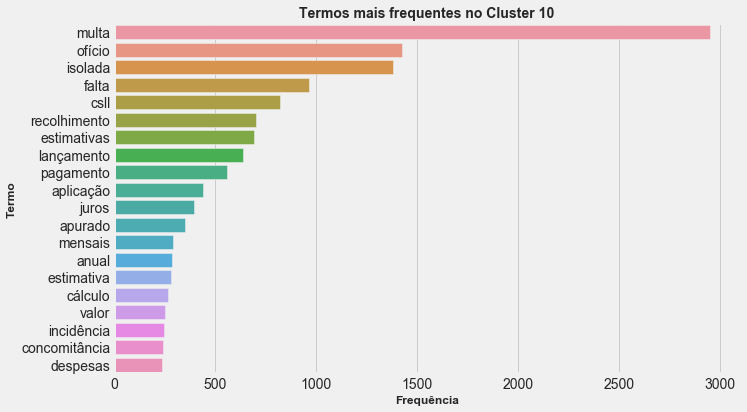

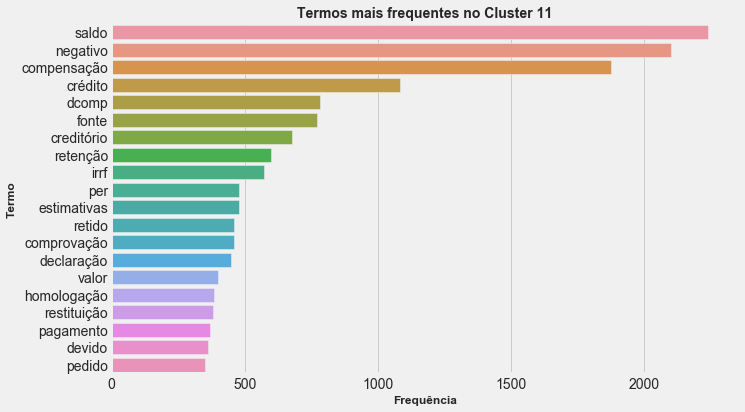

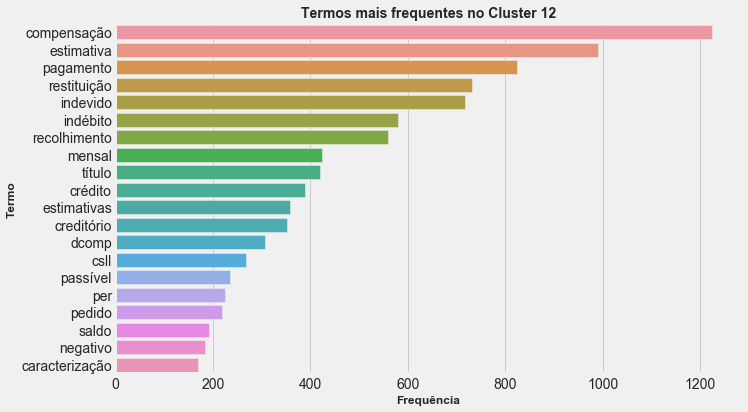

In [56]:
# Plotagem de gráficos com os termos mais frequentes por cluster

for i in range(nro_clusters):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.title('Termos mais frequentes no Cluster {}'.format(i), fontsize=14, fontweight='bold')
    sns.barplot(data=df_termos_freq[df_termos_freq[
        'cluster_ementa'] == i], x='freq', y='palavra', orient='h')
    ax.set_xlabel('Frequência', fontsize=12, fontweight='bold')
    ax.set_ylabel('Termo', fontsize=12, fontweight='bold')
    plt.show()

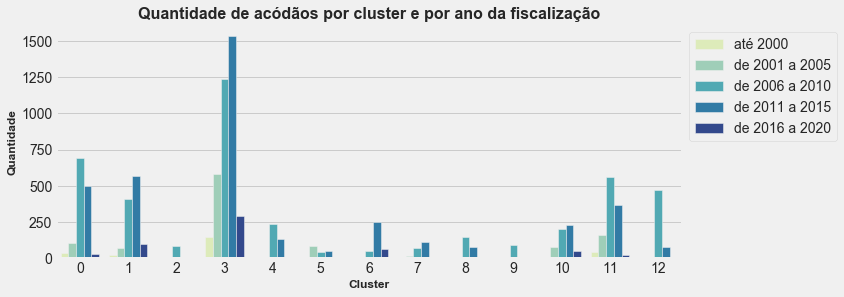

In [57]:
# Visualização da quantidade de decisões por cluster e por ano da fiscalização

df_clusters.sort_values(['bin_ano_fisc'], inplace = True)

fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(df_clusters['cluster'], hue = df_clusters['bin_ano_fisc'], palette = 'YlGnBu')
plt.title("Quantidade de acódãos por cluster e por ano da fiscalização", fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Cluster', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Quantidade', fontsize = 12, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

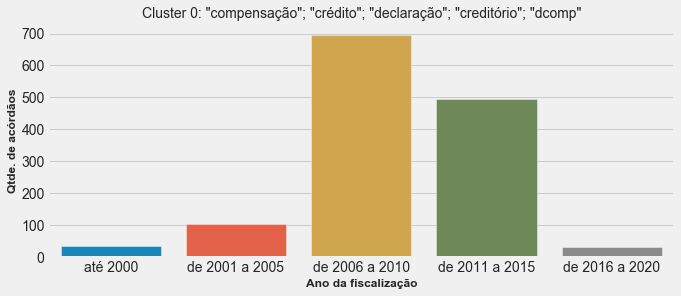

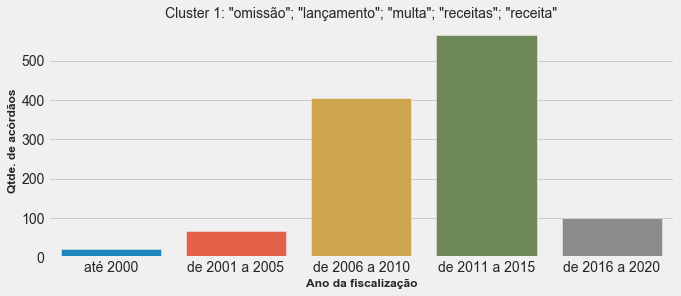

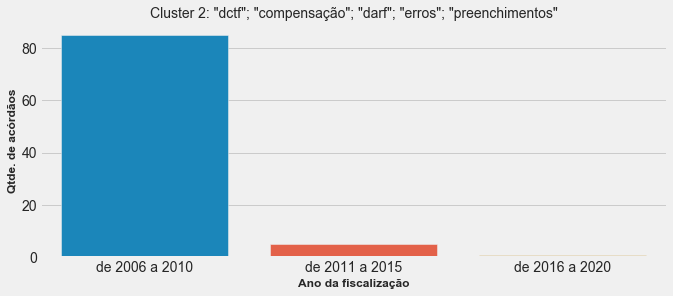

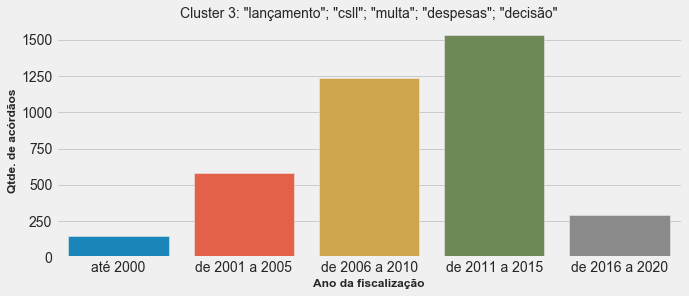

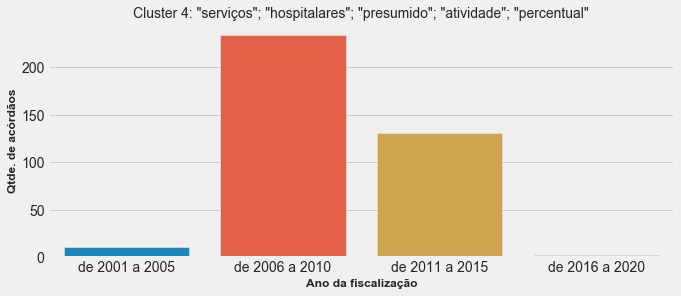

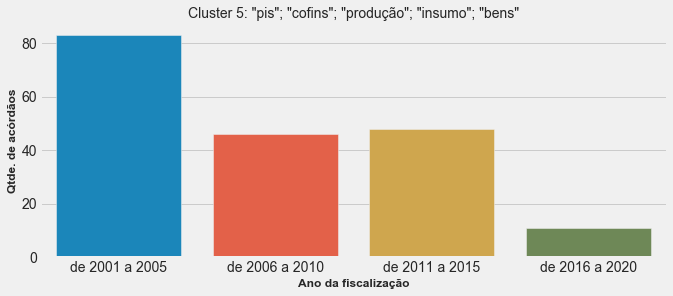

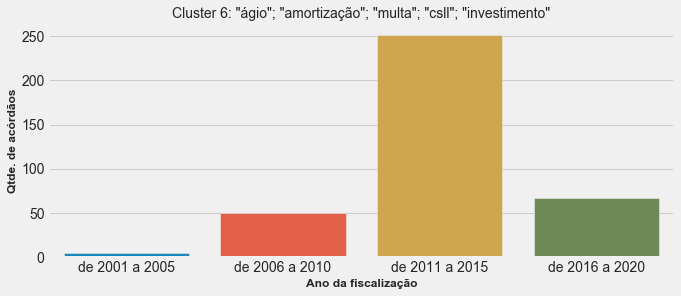

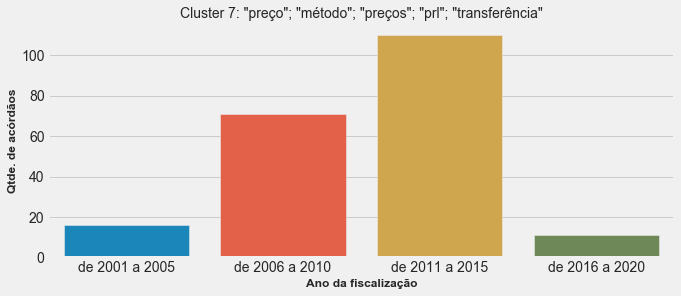

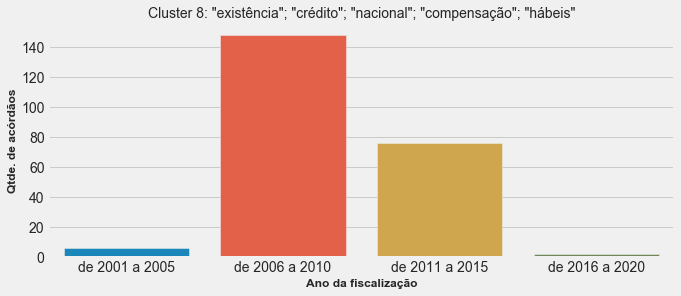

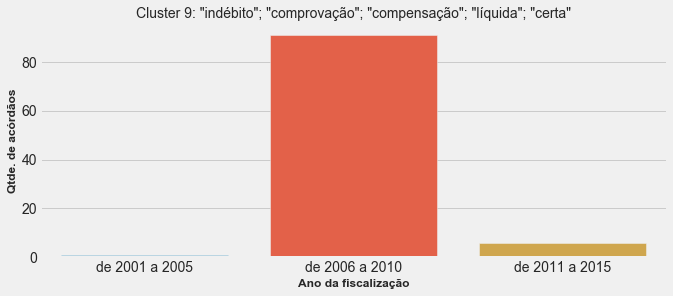

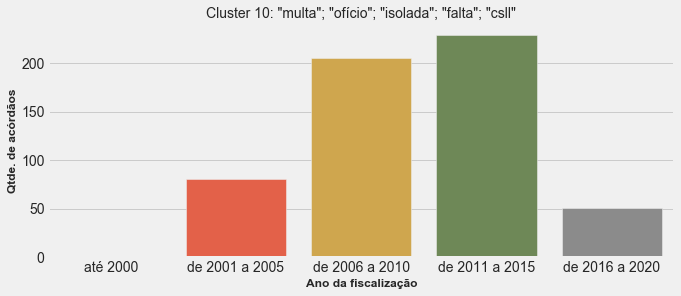

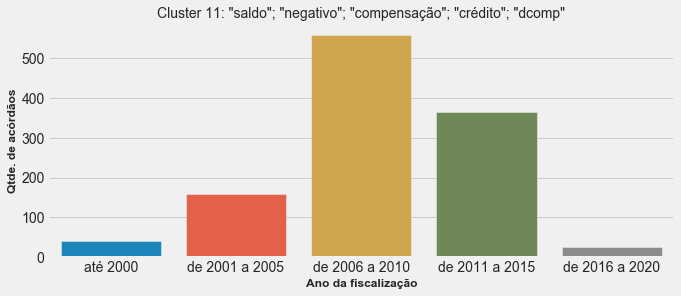

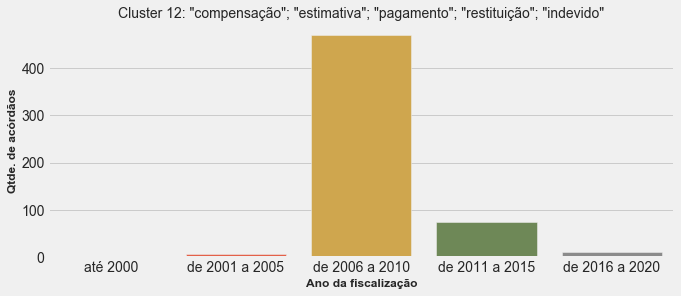

In [58]:
# Detalhamento da análise da distribuição das decisões por ano da fiscalização em cada cluster

for i in range(nro_clusters):
    df_plot = decisoes_com_B3_df[decisoes_com_B3_df['cluster_ementa'] == str(i)].sort_values(['bin_ano_fisc'])
    
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.countplot(df_plot['bin_ano_fisc'])
    plt.title("Cluster "+ str(i) + ': "' +
              df_termos_freq[df_termos_freq['cluster_ementa'] == i]['palavra'].iloc[0] + '"; "' +
              df_termos_freq[df_termos_freq['cluster_ementa'] == i]['palavra'].iloc[1] + '"; "' +
              df_termos_freq[df_termos_freq['cluster_ementa'] == i]['palavra'].iloc[2] + '"; "' +
              df_termos_freq[df_termos_freq['cluster_ementa'] == i]['palavra'].iloc[3] + '"; "' +
              df_termos_freq[df_termos_freq['cluster_ementa'] == i]['palavra'].iloc[4] + '"', fontsize = 14)
    ax.set_xlabel('Ano da fiscalização', fontsize = 12, fontweight = 'bold')
    ax.set_ylabel('Qtde. de acórdãos', fontsize = 12, fontweight = 'bold')
    plt.show()

In [59]:
df_acordaos_por_cluster

qtde_listadas  qtde_nao_listadas  qtde_acordaos  %_listadas
cluster                                                             
0                   17               1345           1362        1.25
1                    6               1155           1161        0.52
2                    0                 91             91        0.00
3                  171               3616           3787        4.52
4                    0                378            378        0.00
5                   12                176            188        6.38
6                   31                342            373        8.31
7                    1                207            208        0.48
8                    0                232            232        0.00
9                    0                 98             98        0.00
10                  21                546            567        3.70
11                  58               1092           1150        5.04
12                  18                549            567        3.17

[13 rows x 4 columns]

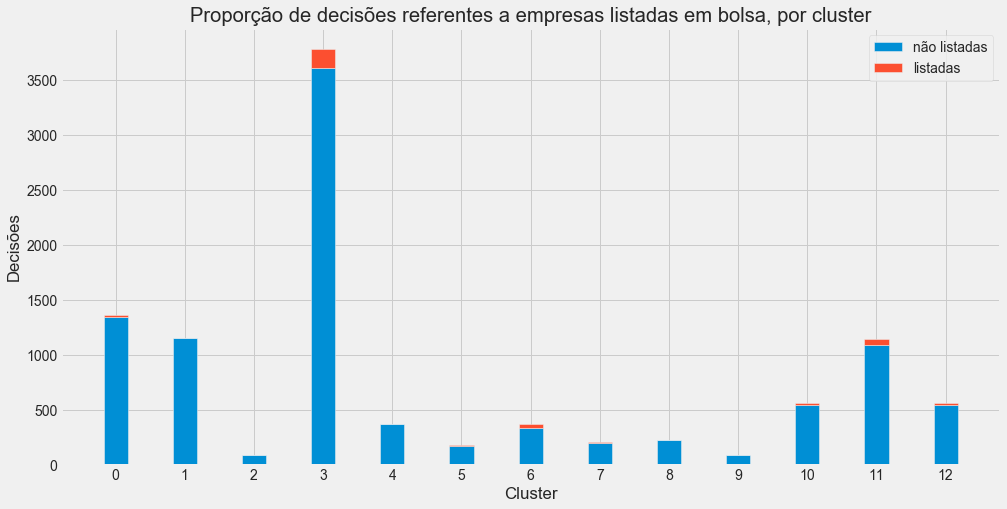

In [60]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax.bar(x = df_acordaos_por_cluster.index,
       height = df_acordaos_por_cluster['qtde_nao_listadas'],
      width = 0.35,
      label = 'não listadas')
ax.bar(x = df_acordaos_por_cluster.index,
      height = df_acordaos_por_cluster['qtde_listadas'],
      width = 0.35,
      bottom = df_acordaos_por_cluster['qtde_nao_listadas'],
      label = 'listadas')
ax.set_ylabel('Decisões')
ax.set_xlabel("Cluster")
ax.set_title("Proporção de decisões referentes a empresas listadas em bolsa, por cluster")
plt.xticks(range(0,13))
ax.legend()
plt.show()

In [61]:
# Teste de Hipóteses - Comparação entre duas proporções
# Comparação da proporção de empresas listadas em cada cluster com a proporção geral do DataFrame (3.30%)
# H0 --> p1 = p2
# H1 --> p1 <> p2

n2 = decisoes_com_B3_df.shape[0]
p2 = round(decisoes_com_B3_df[decisoes_com_B3_df['listada'] == 1].shape[0] / n2, 4)
for i in range(nro_clusters):
    p1 = df_acordaos_por_cluster.loc[i]['%_listadas'] / 100
    n1 = df_acordaos_por_cluster.loc[i]['qtde_acordaos']
    z = (p1 - p2) / ((p1*(1-p1)/n1)+(p2*(1-p2)/n2))**0.5

    # Da Tabela da Distribuição Normal, para um nível de significância (alfa) de 1%, para o teste bilateral, z(alfa/2) = 2,575
    if abs(z) > 2.575:
        # p1 <> p2 --> Rejeita H0 --> as proporções são estatisticamente diferentes
        print("%_listadas no cluster "+str(i)+" ("+str(round(p1*100,2))+
              "%) é estatisticamente diferente de %_listadas em geral (z = "+ str(round(z,2))+")")
    else:
        # p1 = p2 --> Não rejeita H0 --> as proporções não são estatisticamente diferentes
        print("%_listadas no cluster "+str(i)+" ("+str(round(p1*100,2))+
              "%) não é estatísticamente diferente de %_listadas em geral (z = "+ str(round(z,2))+")")

%_listadas no cluster 0 (1.25%) é estatisticamente diferente de %_listadas em geral (z = -5.87)
%_listadas no cluster 1 (0.52%) é estatisticamente diferente de %_listadas em geral (z = -10.09)
%_listadas no cluster 2 (0.0%) é estatisticamente diferente de %_listadas em geral (z = -18.62)
%_listadas no cluster 3 (4.52%) é estatisticamente diferente de %_listadas em geral (z = 3.2)
%_listadas no cluster 4 (0.0%) é estatisticamente diferente de %_listadas em geral (z = -18.62)
%_listadas no cluster 5 (6.38%) não é estatísticamente diferente de %_listadas em geral (z = 1.72)
%_listadas no cluster 6 (8.31%) é estatisticamente diferente de %_listadas em geral (z = 3.48)
%_listadas no cluster 7 (0.48%) é estatisticamente diferente de %_listadas em geral (z = -5.52)
%_listadas no cluster 8 (0.0%) é estatisticamente diferente de %_listadas em geral (z = -18.62)
%_listadas no cluster 9 (0.0%) é estatisticamente diferente de %_listadas em geral (z = -18.62)
%_listadas no cluster 10 (3.7%) não é e

In [62]:
decisoes_com_B3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 26 columns):
nro_acordao          10162 non-null object
nome_cont            10162 non-null object
nro_proc             10162 non-null object
ano_fisc             10162 non-null object
bin_ano_fisc         10162 non-null object
tipo_rec             10162 non-null object
dt_secao             10162 non-null object
ano_dec              10162 non-null object
tempo_para_dec       10162 non-null int64
relator              10162 non-null object
decisao              10162 non-null object
ementa               10162 non-null object
listada              10162 non-null int64
cnpj                 335 non-null object
nome_cia             335 non-null object
ativ_princ           312 non-null object
receita_2019         335 non-null float64
res_antes_tl_2019    335 non-null float64
ir_corr_2019         335 non-null float64
etrc_2019            335 non-null float64
ativo_total_2019     335 non-null float64
p

In [63]:
# Filtragem do DataFrame do Carf_B3, geando um novo DF apenas com as empresas listadas em bolsa, com 335 registros
# Reinicia o índice do df

decisoes_com_B3_list_df = decisoes_com_B3_df.loc[decisoes_com_B3_df['listada'] == 1]
decisoes_com_B3_list_df.reset_index(drop = True, inplace = True)
decisoes_com_B3_list_df.head(2)

nro_acordao                          nome_cont              nro_proc  \
0  9101-002.453                        KLABIN S.A.  19515.002561/2006-75   
1  1402-002.332  PETROLEO BRASILEIRO S A PETROBRAS  16539.720003/2013-58   

  ano_fisc    bin_ano_fisc                        tipo_rec    dt_secao  \
0     2006  de 2006 a 2010  RECURSO ESPECIAL DO PROCURADOR  22/09/2016   
1     2013  de 2011 a 2015              RECURSO VOLUNTARIO  05/10/2016   

  ano_dec  tempo_para_dec                     relator  \
0    2016              10       CRISTIANE SILVA COSTA   
1    2016               3  CAIO CESAR NADER QUINTELLA   

                                             decisao  \
0  Vistos, relatados e discutidos os presentes au...   
1  Vistos, relatados e discutidos os presentes au...   

                                              ementa  listada  \
0  Assunto: Imposto sobre a Renda de Pessoa Juríd...        1   
1  Assunto: Normas Gerais de Direito Tributário\n...        1   

                 cnpj                            nome_cia  \
0  89.637.490/0001-45                         KLABIN S.A.   
1  33.000.167/0001-01  PETROLEO BRASILEIRO S.A. PETROBRAS   

                                          ativ_princ  receita_2019  \
0  Empresa Brasileira de Base Florestal. Produtor...    10271839.0   
1  Pesquisa. Lavra. Refinação. Processamento. Com...   302245000.0   

   res_antes_tl_2019  ir_corr_2019  etrc_2019  ativo_total_2019      pl_2019  \
0           864526.0      -58123.0  -0.067231        34703082.0    6501273.0   
1         47242000.0     5364000.0   0.113543       926011000.0  299137000.0   

                                      ementa_sem_dig  \
0  Assunto: Imposto sobre a Renda de Pessoa Juríd...   
1  Assunto: Normas Gerais de Direito Tributário\n...   

                                         ementa_stem cluster_ementa  \
0  assunt impost sobr a rend de pesso juríd irpj ...              3   
1  assunt norm geral de direit tribut ano-calend ...             11   

                                        ementa_clean  
0  - compensação prejuízo declaração final limita...  
1  csll pis cofins retenção indevida fonte restit...  

[2 rows x 26 columns]

In [64]:
decisoes_com_B3_list_df.describe()

tempo_para_dec  listada  receita_2019  res_antes_tl_2019  ir_corr_2019  \
count      335.000000    335.0  3.350000e+02       3.350000e+02  3.350000e+02   
mean         6.202985      1.0  5.887871e+07       5.833453e+06  9.249388e+05   
std          3.821699      0.0  9.293964e+07       1.467312e+07  1.795817e+06   
min          0.000000      1.0  1.099000e+03      -1.120501e+07 -7.373170e+05   
25%          3.000000      1.0  5.195613e+06       2.097150e+04  1.909100e+04   
50%          5.000000      1.0  1.591874e+07       7.294490e+05  1.529250e+05   
75%          8.000000      1.0  5.232352e+07       2.450173e+06  5.523785e+05   
max         18.000000      1.0  3.022450e+08       4.724200e+07  6.240901e+06   

        etrc_2019  ativo_total_2019       pl_2019  
count  335.000000      3.350000e+02  3.350000e+02  
mean    -0.747498      1.689166e+08  7.089899e+07  
std     15.045108      3.519032e+08  1.923274e+08  
min   -275.268293      9.873000e+03 -2.015998e+06  
25%     -0.000982      1.179174e+07  3.391010e+06  
50%      0.087090      3.283266e+07  7.379873e+06  
75%      0.220211      9.790822e+07  1.925874e+07  
max      0.609138      1.637481e+09  1.159830e+09  

[8 rows x 8 columns]

In [65]:
decisoes_com_B3_list_df[decisoes_com_B3_list_df['etrc_2019'] < -1]

nro_acordao                  nome_cont              nro_proc ano_fisc  \
144  9101-002.518  IRB BRASIL RESSEGUROS S/A  19740.000089/2007-53     2007   
304  1401-004.266                    PBG S/A  10983.721445/2014-78     2014   

       bin_ano_fisc                          tipo_rec    dt_secao ano_dec  \
144  de 2006 a 2010  RECURSO ESPECIAL DO CONTRIBUINTE  13/12/2016    2016   
304  de 2011 a 2015                RECURSO VOLUNTARIO  10/03/2020    2020   

     tempo_para_dec                          relator  \
144               9            ANDRE MENDES DE MOURA   
304               6  LUIZ AUGUSTO DE SOUZA GONCALVES   

                                               decisao  \
144  Vistos, relatados e discutidos os presentes au...   
304  Vistos, relatados e discutidos os presentes au...   

                                                ementa  listada  \
144  Assunto: Contribuição Social sobre o Lucro Líq...        1   
304  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...        1   

                   cnpj                      nome_cia  \
144  33.376.989/0001-91  IRB - BRASIL RESSEGUROS S.A.   
304  83.475.913/0001-91                       PBG S/A   

                               ativ_princ  receita_2019  res_antes_tl_2019  \
144  Operações de Resseguro E Retrocessão     6610019.0           717233.0   
304                                   NaN     1114269.0              -41.0   

     ir_corr_2019   etrc_2019  ativo_total_2019    pl_2019  \
144     -737317.0   -1.028002        17501252.0  3945150.0   
304       11286.0 -275.268293         1836292.0   367636.0   

                                        ementa_sem_dig  \
144  Assunto: Contribuição Social sobre o Lucro Líq...   
304  ASSUNTO: IMPOSTO SOBRE A RENDA DE PESSOA JURÍD...   

                                           ementa_stem cluster_ementa  \
144  assunt contribu soc sobr o lucr líqu csll ano-...              3   
304  assunt impost sobr a rend de pesso juríd (irpj...             10   

                                          ementa_clean  
144  social líquido - csll csll lucros exterior pri...  
304  (irpj) receitas decorrentes utilização prejuíz...  

[2 rows x 26 columns]

In [66]:
# Criação do DataFrame df_list, com apenas algumas features do DF principal, para possibilitar o cálculo 
# das médias e desvios-padrões por cluster

df_list = decisoes_com_B3_list_df[['cluster_ementa', 'receita_2019',
                   'res_antes_tl_2019', 'ir_corr_2019', 
                   'etrc_2019', 'ativo_total_2019', 'pl_2019']]
df_list['cluster_ementa'] = df_list['cluster_ementa'].astype(int)
df_list

cluster_ementa  receita_2019  res_antes_tl_2019  ir_corr_2019  etrc_2019  \
0                 3    10271839.0           864526.0      -58123.0  -0.067231   
1                11   302245000.0         47242000.0     5364000.0   0.113543   
2                 3   302245000.0         47242000.0     5364000.0   0.113543   
3                 3    39644010.0          1674720.0      240400.0   0.143546   
4                10    52323525.0         -4802969.0      228945.0  -0.047667   
5                 3      668818.0            73187.0       19091.0   0.260852   
6                 3     1915308.0            28280.0        7266.0   0.256931   
7                 3      668818.0            73187.0       19091.0   0.260852   
8                 3    52323525.0         -4802969.0      228945.0  -0.047667   
9                 3     2049723.0           367999.0       87840.0   0.238696   
..              ...           ...                ...           ...        ...   
325               3    52599709.0         12943005.0     1118054.0   0.086383   
326              11     3294749.0          1100091.0       29640.0   0.026943   
327               6    52599709.0         12943005.0     1118054.0   0.086383   
328               6    52599709.0         12943005.0     1118054.0   0.086383   
329              11    18796346.0          3680059.0      200787.0   0.054561   
330               3    18080692.0          2027056.0      622218.0   0.306956   
331               6    39644010.0          1674720.0      240400.0   0.143546   
332               3     5904286.0           422600.0       73316.0   0.173488   
333               3     5904286.0           422600.0       73316.0   0.173488   
334              10   204523575.0          7497800.0     1110003.0   0.148044   

     ativo_total_2019      pl_2019  
0          34703082.0    6501273.0  
1         926011000.0  299137000.0  
2         926011000.0  299137000.0  
3          54002970.0   27173127.0  
4          68129037.0    3944706.0  
5           3331667.0     208136.0  
6           1945403.0     534892.0  
7           3331667.0     208136.0  
8          68129037.0    3944706.0  
9           7798912.0    1451170.0  
..                ...          ...  
325       101742944.0   62556005.0  
326        11919475.0    8710100.0  
327       101742944.0   62556005.0  
328       101742944.0   62556005.0  
329        37530095.0    9773372.0  
330        32711299.0    8269784.0  
331        54002970.0   27173127.0  
332        10567762.0    3660976.0  
333        10567762.0    3660976.0  
334       126339387.0   32482049.0  

[335 rows x 7 columns]

In [67]:
df_media = pd.DataFrame()

for i in range(0, nro_clusters):
    df = df_list[df_list['cluster_ementa'] == i]
    df.drop(columns = ['cluster_ementa'], inplace = True)
    df_media = pd.concat([df_media, pd.DataFrame(df.mean(), columns = [i])], ignore_index = True, axis = 1)

df_media = df_media.T
df_media.dropna(inplace = True)

df = pd.DataFrame(df_list['cluster_ementa'].value_counts())
df.sort_index(inplace = True)
df.rename(columns = {'cluster_ementa': 'qtde_dec'}, inplace = True)

df_media = pd.concat([df, df_media], axis = 1)
df_media

qtde_dec  receita_2019  res_antes_tl_2019  ir_corr_2019  etrc_2019  \
0         17  8.605695e+07       4.390487e+06  2.082128e+06  -0.076426   
1          6  1.044802e+08       4.143334e+06  6.889362e+05   0.142542   
3        171  6.463965e+07       7.386465e+06  1.011403e+06   0.089829   
5         12  2.725196e+07      -3.233107e+06  2.208748e+05  -0.035542   
6         31  3.050591e+07       2.710288e+06  3.578969e+05   0.096094   
7          1  2.601295e+07      -4.097203e+06  2.461100e+05  -0.060068   
10        21  2.719570e+07      -1.323354e+05  1.743943e+05 -13.094061   
11        58  7.522006e+07       8.883244e+06  1.276296e+06   0.054374   
12        18  1.936360e+07       2.113853e+06  3.164417e+05   0.222248   

    ativo_total_2019       pl_2019  
0       2.984021e+08  1.415913e+08  
1       7.955452e+07  1.864113e+07  
3       2.018727e+08  8.944882e+07  
5       8.854029e+07  1.643137e+07  
6       6.142035e+07  2.084828e+07  
7       9.790822e+07  1.808797e+07  
10      3.526070e+07  7.781686e+06  
11      1.864979e+08  6.363712e+07  
12      1.052719e+08  6.781024e+07  

[9 rows x 7 columns]

In [68]:
df_desvp = pd.DataFrame()

for i in range(0, nro_clusters):
    df = df_list[df_list['cluster_ementa'] == i]
    df.drop(columns = ['cluster_ementa'], inplace = True)
    # O cluster 7 possui apenas 1 empresa listada. Para calcular o desvio-padrão, é necessário ajustar o parâmetro 
    # ddof (delta graus de liberdade) da função std(). O desvio-padrão de uma amostra com 1 elemento deve ser ZERO.
    # Se esse parâmetro não fosse ajustado, a função std() retornaria um NaN
    if i == 7:
        df_desvp = pd.concat([df_desvp, pd.DataFrame(df.std(ddof = 0), columns = [i])], ignore_index = True, axis = 1)
    else:
        df_desvp = pd.concat([df_desvp, pd.DataFrame(df.std(), columns = [i])], ignore_index = True, axis = 1)

df_desvp = df_desvp.T
df_desvp.dropna(inplace = True)

df = pd.DataFrame(df_list['cluster_ementa'].value_counts())
df.sort_index(inplace = True)
df.rename(columns = {'cluster_ementa': 'qtde_dec'}, inplace = True)

df_desvp = pd.concat([df, df_desvp], axis = 1)
df_desvp

qtde_dec  receita_2019  res_antes_tl_2019  ir_corr_2019  etrc_2019  \
0         17  1.075979e+08       1.843151e+07  2.819936e+06   0.323283   
1          6  1.096591e+08       3.802115e+06  5.377756e+05   0.098820   
3        171  1.004956e+08       1.586366e+07  1.915644e+06   0.205072   
5         12  2.893692e+06       2.018094e+06  5.893665e+04   0.057281   
6         31  5.384661e+07       9.306015e+06  9.829385e+05   0.108866   
7          1  0.000000e+00       0.000000e+00  0.000000e+00   0.000000   
10        21  4.533285e+07       2.841801e+06  2.603455e+05  60.071968   
11        58  1.048693e+08       1.711047e+07  1.992854e+06   0.252806   
12        18  4.491911e+07       6.600289e+06  2.919267e+05   0.188682   

    ativo_total_2019       pl_2019  
0       4.632782e+08  2.830844e+08  
1       6.107897e+07  1.620582e+07  
3       3.998785e+08  2.264113e+08  
5       2.187878e+07  3.868992e+06  
6       1.633350e+08  5.473758e+07  
7       0.000000e+00  0.000000e+00  
10      3.266872e+07  9.785411e+06  
11      3.239754e+08  1.058566e+08  
12      3.827062e+08  2.725413e+08  

[9 rows x 7 columns]

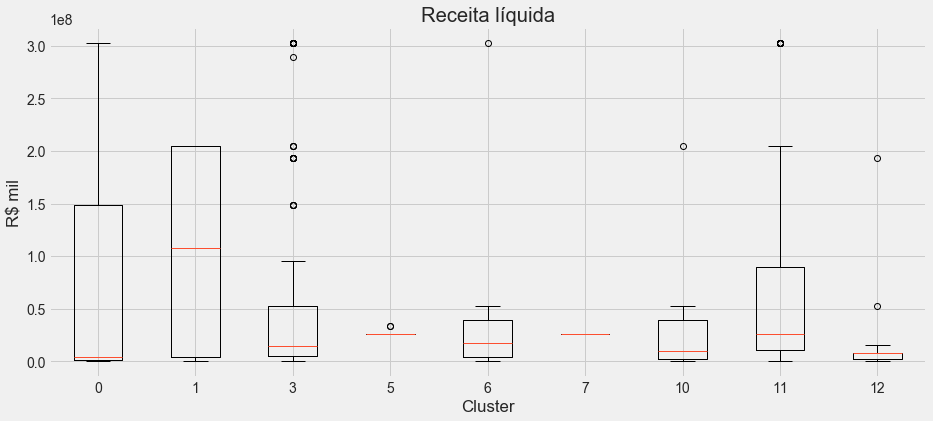

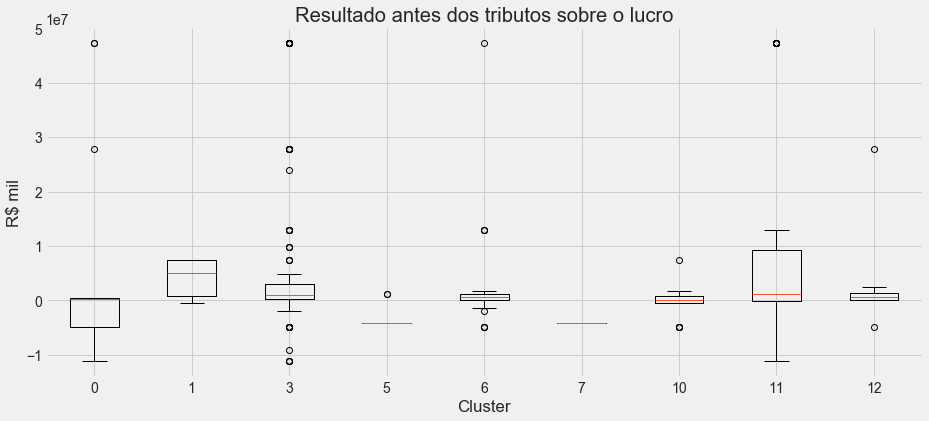

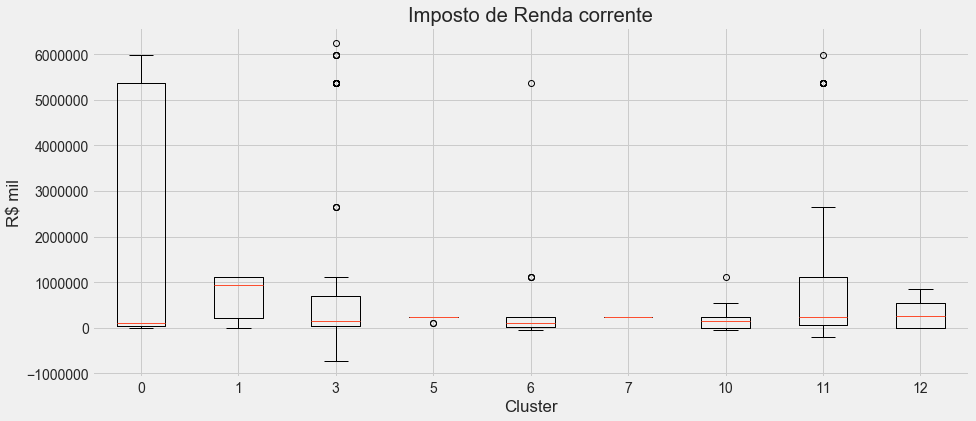

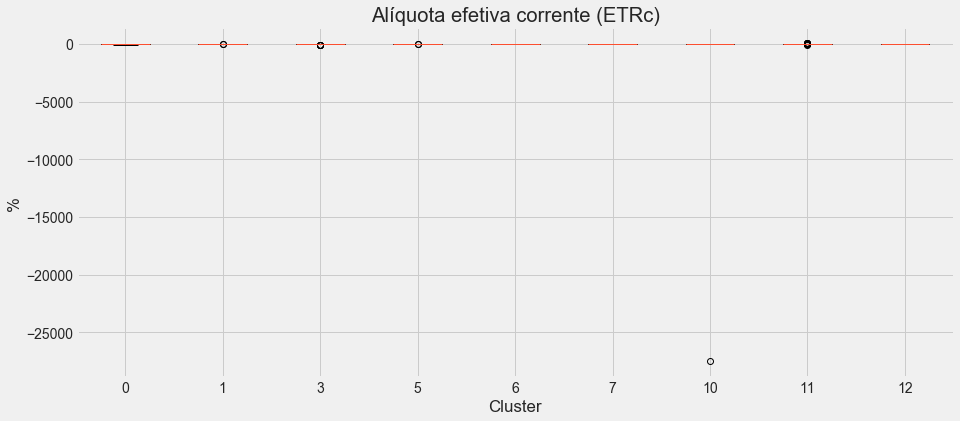

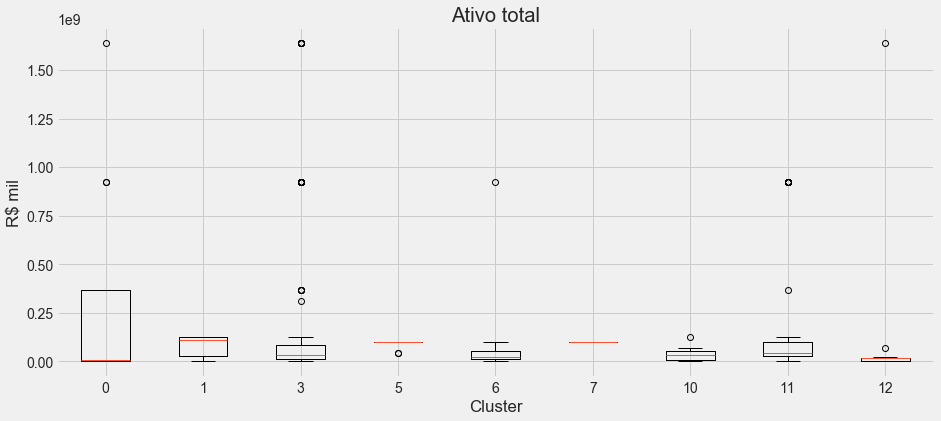

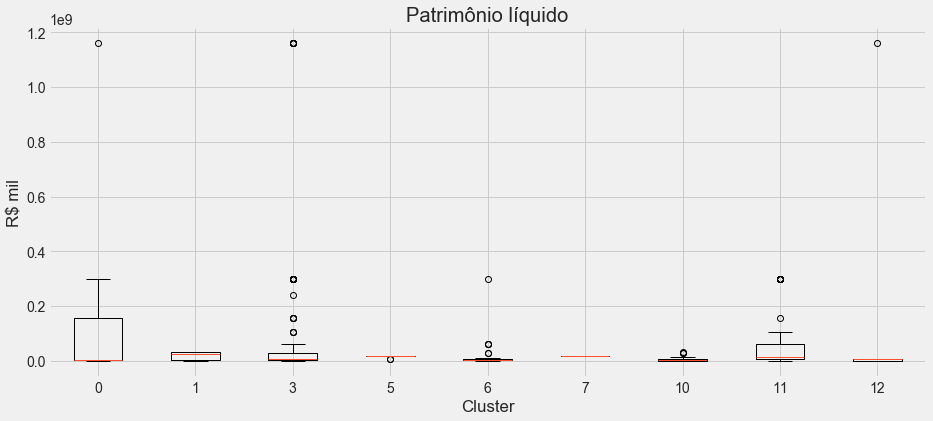

In [69]:
# Plotagem dos boxplots das features "financeiras", para comparação entre os clusters

# Lista os clusters que contaram com pelo menos 1 empresa listada em bolsa
clusters_list = ['0', '1', '3', '5', '6', '7', '10', '11', '12']

l_receita = []
l_res = []
l_ir = []
l_etrc = []
l_ativo = []
l_pl = []

# Adequação da apresentação do ETRc, para porcentagem
decisoes_com_B3_list_df['etrc_2019'] = decisoes_com_B3_list_df['etrc_2019'] * 100
df_list['etrc_2019'] = df_list['etrc_2019'] * 100


# Cria 6 listas de listas, com os valores das features
for cluster in clusters_list:
    df = decisoes_com_B3_list_df[decisoes_com_B3_list_df['cluster_ementa'] == cluster]
    l_receita.append(df['receita_2019'].tolist())
    l_res.append(df['res_antes_tl_2019'].tolist())
    l_ir.append(df['ir_corr_2019'].tolist())
    l_etrc.append(df['etrc_2019'].tolist())
    l_ativo.append(df['ativo_total_2019'].tolist())
    l_pl.append(df['pl_2019'].tolist())

# Cria um dicionário, para facilitar a plotagem dos dados 
d_features = {"Receita líquida": l_receita,
              "Resultado antes dos tributos sobre o lucro": l_res,
              "Imposto de Renda corrente": l_ir,
              "Alíquota efetiva corrente (ETRc)": l_etrc,
              "Ativo total": l_ativo,
              "Patrimônio líquido": l_pl}

for nome, feature in d_features.items():
    fig, ax = plt.subplots(figsize = (14,6))
    ax.set_title(nome)
    plt.xlabel('Cluster')
    plt.ylabel('%' if nome == 'Alíquota efetiva corrente (ETRc)' else "R$ mil")
    plt.boxplot(feature, labels = clusters_list, vert = True)
    plt.show()

In [70]:
# TRATAMENTO DOS OUTLIERS PARA VISUALIZAÇÃO

# Cálculo dos limites superior e inferior com base no IQR - Intervalo interquartílico
q1 = decisoes_com_B3_list_df.quantile(q = 0.25)
q2 = decisoes_com_B3_list_df.quantile(q = 0.5)
q3 = decisoes_com_B3_list_df.quantile(q = 0.75)
iqr = q3 - q1
minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr
df_calc_iqr = pd.DataFrame([q1, q2, q3, iqr, minimum, maximum], index = ['q1', 'q2', 'q3', 'iqr', 'minimum', 'maximum'])

df_calc_iqr

tempo_para_dec  listada  receita_2019  res_antes_tl_2019  \
q1                  3.0      1.0     5195613.0           20971.50   
q2                  5.0      1.0    15918741.0          729449.00   
q3                  8.0      1.0    52323525.0         2450173.00   
iqr                 5.0      0.0    47127912.0         2429201.50   
minimum            -4.5      1.0   -65496255.0        -3622830.75   
maximum            15.5      1.0   123015393.0         6093975.25   

         ir_corr_2019  etrc_2019  ativo_total_2019     pl_2019  
q1           19091.00  -0.098206        11791735.0   3391010.0  
q2          152925.00   8.708963        32832664.0   7379873.0  
q3          552378.50  22.021062        97908225.0  19258737.0  
iqr         533287.50  22.119268        86116490.0  15867727.0  
minimum    -780840.25 -33.277107      -117383000.0 -20410580.5  
maximum    1352309.75  55.199964       227082960.0  43060327.5  

[6 rows x 8 columns]

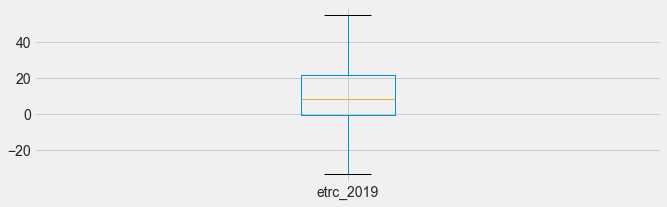

In [71]:
# TRATAMENTO DOS OUTLIERS PARA VISUALIZAÇÃO

# EXECUTA A SUBSTITUIÇÃO DOS OUTLIERS DA FEATURE 'etrc_2019'
# Substituição dos outliers pelos pontos máximos ou mínimos, ou seja: se a observação for maior que q3+1,5*iqr, ela é 
# substituída por esse valor máximo. Se a observação for menor do que q1-1,5*iqr, ela substituída por esse valor mínimo 

decisoes_com_B3_list_df.loc[decisoes_com_B3_list_df[
    'etrc_2019'] > df_calc_iqr.loc['maximum']['etrc_2019'], 'etrc_2019'] = df_calc_iqr.loc['maximum', 'etrc_2019']
decisoes_com_B3_list_df.loc[decisoes_com_B3_list_df[
    'etrc_2019'] < df_calc_iqr.loc['minimum']['etrc_2019'], 'etrc_2019'] = df_calc_iqr.loc['minimum', 'etrc_2019']
fig, ax = plt.subplots(figsize = (10,3))
decisoes_com_B3_list_df[['etrc_2019']].boxplot(vert = True)

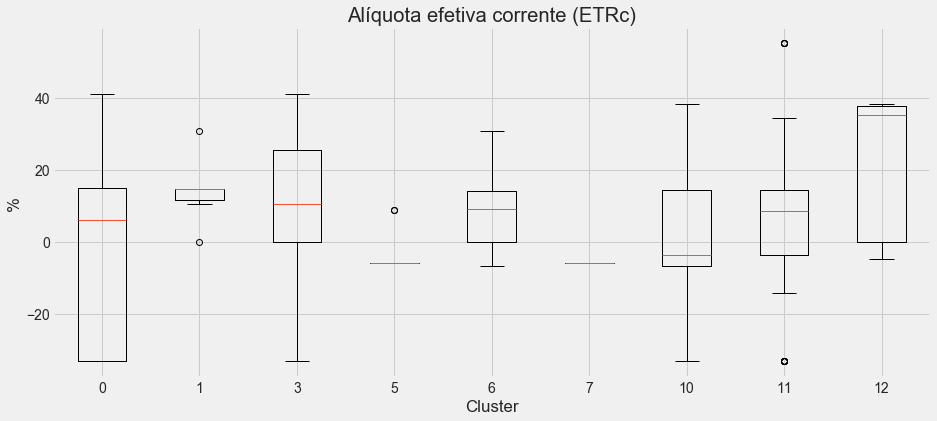

In [72]:
# Nova plotagem do boxplot para a ETRc, após o tratamento dos outliers

l_etrc = []

for cluster in clusters_list:
    df = decisoes_com_B3_list_df[decisoes_com_B3_list_df['cluster_ementa'] == cluster]
    l_etrc.append(df['etrc_2019'].tolist())

# Cria um dicionário, para facilitar a plotagem dos dados 
d_features = {"Alíquota efetiva corrente (ETRc)": l_etrc}

for nome, feature in d_features.items():
    fig, ax = plt.subplots(figsize = (14,6))
    ax.set_title(nome)
    plt.xlabel('Cluster')
    plt.ylabel('%')
    plt.boxplot(feature, labels = clusters_list, vert = True)
    plt.show()